In [4]:
import os
#from google.colab import drive
#drive.mount('/content/drive')

basic_path = "C:/Users/silvests/Embodied_counting/src/"

# Import: imports
directory_path = basic_path

file_name = "imports.py"
PATH = directory_path + file_name
%run -i $PATH

# Import: environment
directory_path = basic_path + "environment/"

file_name = "count_environment.py"
PATH = directory_path + file_name
%run -i $PATH
!python $PATH

file_name = "solving_algorithms.py"
PATH = directory_path + file_name
%run -i $PATH


# Import: models
directory_path = basic_path + "models/"

file_name = "simplest_LangConvLSTM_with_graph.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "own_graph_class.py"
PATH = directory_path + file_name
%run -i $PATH


# Import: train_and_test
directory_path = basic_path + "train_and_test/"

file_name = "train_model_original.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "test_model.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "demonstrate_model.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "env_to_pytorch_interface.py"
PATH = directory_path + file_name
%run -i $PATH


# Import: manage_results
directory_path = basic_path + "manage_results/"

file_name = "run_schedules.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "save_and_plot.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "plot_network_with_plotly.py"
PATH = directory_path + file_name
%run -i $PATH

file_name = "plot_hinton_diagrams.py"
PATH = directory_path + file_name
%run -i $PATH

CUDA_bool = False
RESULTS_PATH = "C:/Users/silvests/Embodied_counting/Results/"
SOURCE_PATH = "C:/Users/silvests/Embodied_counting/src/"

Import ...
Libraries/Packages successfully imported...
Load Count-Environment..!
Load Count-Environment..!
Loading Automatic Solving Algorithms..
Loading model....??
Load own Graph class ...
Load training process..
Load test process .... 
Import demonstrate-model ..
Load env-to-pytorch interface .... 
Load run, schedules ..! 
Load result managing..!
Load Hinton-diagrams...!


In [5]:
#############
# Get graphs for different tasks
##############################
#PATH = "/content/drive/My Drive/Embodied_counting/Results/count_all_objects__count_all_events__give_n__recite_n__1_TIMES__1038/multiple_tasks_1_to_9_20-01-26-08-43model-1002_/multiple_tasks_1_to_9_20-01-26-08-43model-1002_"
#PATH = "C:/Users/silvests/Embodied_counting/Results/count_all_objects__1_TIMES__7989/count_all_objects_1_to_9_20-03-13-12-51model-6645_/count_all_objects_1_to_9_20-03-13-12-51model-6645_"
#PATH = "C:/Users/silvests/Embodied_counting/Results/master_all/master_all/multiple_tasks_1_to_9_20-03-31-01-29model-8138_"
PATH = "C:/Users/silvests/Embodied_counting/Results/master_all/master_all/multiple_tasks_1_to_9_20-03-31-11-44model-1339_"


n_squares = 9

graph_recite_n = get_graph_from_task_trial(PATH, "recite_n", n_squares)
graph_count_events = get_graph_from_task_trial(PATH, "count_all_events", n_squares)
graph_count_objects = get_graph_from_task_trial(PATH, "count_all_objects", n_squares)
graph_give_n = get_graph_from_task_trial(PATH, "give_n", n_squares)

graph_list_recite_n = GraphListClass(graph_recite_n, "Recite-N")
graph_list_count_all_events = GraphListClass(graph_count_events, "Count all events")
graph_list_count_all_objects = GraphListClass(graph_count_objects, "Count all objects")
graph_list_give_n = GraphListClass(graph_give_n, "Give-N")

multiple_graph_lists = [graph_list_count_all_events, graph_list_count_all_objects, graph_list_give_n]




<Figure size 864x864 with 0 Axes>

In [154]:
    
def hinton_from_multiple_graph_lists(multiple_graph_lists, 
                                     asked_numbers, 
                                     layers=(0,1),
                                     axis=None, 
                                     figy=None, 
                                     weight_encoding='size',
                                     max_weight=None,
                                    highlight_number=None,
                                    highlight_output_number=None):
#(matrix,axis=None, figy=None, input_nodes=None,input_node_description="",output_nodes=None,output_names=None, max_weight=None, ax=None, weight_encoding='size', graphy=None):
    """Draw Hinton diagram for visualizing a weight matrix."""  
    
    
    small_font_size = 14
    
    graphy = multiple_graph_lists[0].graph_list[0]
    scale_fig=0.5
    matrix=graphy.weights[layers].transpose()
    n_tasks = len(multiple_graph_lists)
    n_asked_numbers = len(asked_numbers)
    
    time_step = multiple_graph_lists[0].time_steps_count_and_no_count[asked_numbers[0]][0]
    
    output_nodes = multiple_graph_lists[0].node_activations[layers[1]][time_step]
    input_node_description = multiple_graph_lists[0].graph_list[0].layer_descriptions[layers[0]][0]
    output_names = np.asarray([i for i in range(len(graphy.nodes_in_layer[layers[1]]))])
    
    #output_nodes = multiple_graph_lists[0].output_nodes_list[time_step]
    #input_node_description = multiple_graph_lists[0].input_node_description[0]
    #create self.graphs_of_asked_number[] in GraphListClass or same from def compare
    
    n_rows = len(asked_numbers)
    n_cols = len(multiple_graph_lists)
    

    fig_sizy=(matrix.shape[0]*scale_fig,matrix.shape[1]*scale_fig+n_asked_numbers*n_tasks)
    fig, ax = plt.subplots(figsize=fig_sizy)
    
    if(figy is not None and axis is not None):
        fig = figy
        ax = axis
    
    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

    ax.patch.set_facecolor('gray') #gray
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    ## Extend patch to left
    text_dist = 1
    text_rect = plt.Rectangle([-14, 0], 1, 0.1, facecolor='gray', edgecolor='gray')
    ax.add_patch(text_rect)
    if(len(multiple_graph_lists)>1):
        distance_between_asked_numbers = 3.0
        extra_dist_2 = 0.0
    else:
        distance_between_asked_numbers = 0.0
        extra_dist_2 = 3.0
    n_no_counts=0
    
    
    if(matrix.shape[0]>matrix.shape[1]):
         #print("low matrix")
         extra_dist_3=0.0
    else:
         #print("hight matrix")
         extra_dist_3=1.5
        
    highlight_upper_corners = {}
    highlight_lower_corners = {}
    
        
    for a in range(len(asked_numbers)):
            
        for tasky in range(len(multiple_graph_lists)):
                if(asked_numbers[a]=='no_count'):
                    time_step = multiple_graph_lists[tasky].time_steps_count_and_no_count[asked_numbers[a]][n_no_counts]
                    if(tasky==len(multiple_graph_lists)-1):
                        n_no_counts+=1
                else:
                    time_step = multiple_graph_lists[tasky].time_steps_count_and_no_count[asked_numbers[a]][0]
                #input_nodes = multiple_graph_lists[tasky].input_nodes_list[time_step]
                input_nodes = multiple_graph_lists[tasky].node_activations[layers[0]][time_step]
                dist_to_weights = 3
                for x in range(input_nodes.size):
                    max_ampl=2 ** np.ceil(np.log(np.abs(input_nodes).max()) / np.log(2))
                    color, size = get_rect_size_and_color(amplitude=input_nodes[x],max_amplitude=max_ampl,amplitude_encoding=weight_encoding, fixed_size=1)
                    rect = plt.Rectangle([x - size / 2, -dist_to_weights-size/2-tasky-n_tasks*a-a*distance_between_asked_numbers], size, size,
                                     facecolor=color, edgecolor=color)
                    ax.add_patch(rect)
                    
                    ## remember last node position for higlighting if needed
                    if(highlight_number is not None):
                        if(x in highlight_number and a==len(asked_numbers)-1 and tasky==len(multiple_graph_lists)-1):
                            highlight_upper_corners[x] = [x-size/2, -dist_to_weights-size/2-tasky-n_tasks*a-a*distance_between_asked_numbers]
                if(len(multiple_graph_lists)>1):
                    task_spec = multiple_graph_lists[tasky].task + ":"
                    #ax.text(-dist_to_weights-len(task_spec)/2.4-1.1,-dist_to_weights-tasky, task_spec, fontsize=12)
                    ax.text(-dist_to_weights+1.7,-dist_to_weights-tasky-n_tasks*a+1/4-a*distance_between_asked_numbers, task_spec, fontsize=small_font_size,horizontalalignment='right')
        
                
        if(type(asked_numbers[a])==int):
            asked_number_description = "Entity Count " + str(asked_numbers[a]) + " :"
        if(asked_numbers[a]=='no_count'):
            asked_number_description = "No Entity"  + ":"
        #ax.text(-dist_to_weights-7.5-extra_dist_2,-dist_to_weights-tasky-n_tasks*a+1/4-(a+0.5)*distance_between_asked_numbers, asked_number_description, fontsize=small_font_size,color='blue',horizontalalignment='left')
        
        if(len(multiple_graph_lists)>1):
            # put distance between asked numbers
            rect = plt.Rectangle([x - size / 2, -dist_to_weights-size/2-tasky-n_tasks*a-distance_between_asked_numbers], size, size,
            facecolor='gray', edgecolor='gray')
            ax.add_patch(rect)


    # node-enumeration
    for x in range(input_nodes.size):
        ax.text(x, -dist_to_weights-size/2-tasky-n_tasks*a-a*distance_between_asked_numbers-1, str(x), fontsize=small_font_size,horizontalalignment='center')


    
    if(output_nodes is not None):
        dist_to_weights = 3
        for y in range(output_nodes.size):
            max_ampl=2 ** np.ceil(np.log(np.abs(output_nodes).max()) / np.log(2))
            color, size = get_rect_size_and_color(amplitude=output_nodes[y],max_amplitude=max_ampl,amplitude_encoding=weight_encoding, fixed_size=1)
            rect = plt.Rectangle([-dist_to_weights - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
            if(n_asked_numbers==1):
                ax.add_patch(rect)
            
            extra_distance = 0.4
            if(output_names is not None):
                ax.text(-dist_to_weights-1/2-extra_distance, y+0.3, str(output_names[y]), fontsize=small_font_size,horizontalalignment='right')
            

            
    for (x, y), w in np.ndenumerate(matrix):
        color, size = get_rect_size_and_color(amplitude=w,max_amplitude=max_weight,amplitude_encoding=weight_encoding, fixed_size=1)    
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)
    
    # get lower corners of highlighted numbers
    if(highlight_number is not None):
        for n in highlight_number:
            highlight_lower_corners[n] = [n-1/2, +matrix.shape[1]- 1 / 2]

            # Highlight: highlight_number
            highlight_color = (1,1,0,0.2)
            highlight_border_color = (1,1,0,1.0)
            #(x1, y1), width=x4-x1, height=y2-y1, linewidth=1,
            extra_dist_2=0.15
            include_number=True
            extra_y_up=0.0
            if(include_number):
                extra_y_up=1.6 + extra_dist_3

            x4= highlight_upper_corners[n][0]+0.9+extra_dist_2-extra_dist_3/5
            y2= highlight_upper_corners[n][1]-extra_dist_2-extra_y_up
            x1= highlight_lower_corners[n][0]-extra_dist_2
            y1= highlight_lower_corners[n][1]+extra_dist_2
            rect = plt.Rectangle((x1, y1), width=x4-x1, height=y2-y1, linewidth=1.9,
                facecolor='none', edgecolor=highlight_border_color)
            ax.add_patch(rect)
    ### Highlight outputnumber        
    if(highlight_output_number is not None):
        for n in highlight_output_number:
            highlight_lower_corners[n] = [n-1/2, +matrix.shape[1]- 1 / 2]
            highlight_upper_corners[n] = [n-1/2, +matrix.shape[1]- 1 / 2]

            # Highlight: highlight_number
            highlight_color = (1,1,0,0.2)
            highlight_border_color = (1,1,0,1.0)
            #(x1, y1), width=x4-x1, height=y2-y1, linewidth=1,
            extra_dist_2=0.15
            include_number=True
            extra_y_up=0.0
            if(include_number):
                extra_y_up=1.6

            x4= matrix.shape[0]
            x1= 0-1/2-extra_dist_2-dist_to_weights-1-extra_distance-1
            y2= n + 1 / 2+extra_distance/2

            y1= n - 1 / 2-extra_distance/2
            rect = plt.Rectangle((x1, y1), width=x4-x1, height=y2-y1, linewidth=1.9,
                facecolor='none', edgecolor=highlight_border_color)
            ax.add_patch(rect)  
            
    # Add "W" description
    text_dist = 1
    text_rect = plt.Rectangle([matrix.shape[0]/2-2, matrix.shape[1]+text_dist+1], 1, 0.1, facecolor='gray', edgecolor='gray')
    ax.add_patch(text_rect)
    ax.text(matrix.shape[0]/2-2, matrix.shape[1]+text_dist+1, "W", fontsize=26)
    
    # Add representation description
    text_dist = 1
    text_rect = plt.Rectangle([matrix.shape[0]/2-2, -text_dist-dist_to_weights-size-3-n_tasks*n_asked_numbers-a*distance_between_asked_numbers], 1, 0.1, facecolor='gray', edgecolor='gray')
    ax.add_patch(text_rect)
    
    if(input_node_description=='Input'):
        input_node_description='Auditory feedback'
    ax.text(matrix.shape[0]/2-7.0-4, -text_dist-dist_to_weights-size-n_tasks*n_asked_numbers-a*distance_between_asked_numbers-1-extra_dist_3, input_node_description, fontsize=20) #30
        
    # Draw a horizontal line to separate Weight matrix and node activity:
    # draw vertical line from (70,100) to (70, 250)
    plt.plot([-2, matrix.shape[0]], [-1, -1], 'k-', lw=2)
    
    ax.autoscale_view()
    ax.invert_yaxis()

    
    return fig


C:/Users/silvests/Embodied_counting/src/manage_results/plot_hinton_diagrams.py:88: RuntimeWarning:

divide by zero encountered in log

C:/Users/silvests/Embodied_counting/src/manage_results/plot_hinton_diagrams.py:151: RuntimeWarning:

invalid value encountered in double_scalars



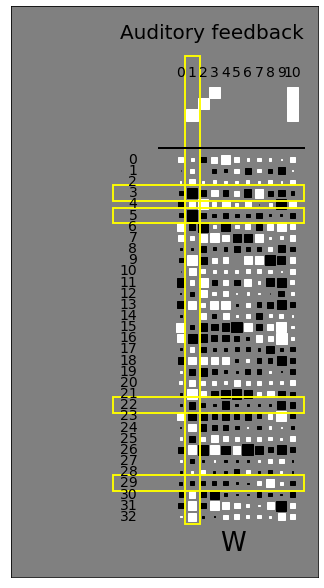

In [155]:
multiple_graph_lists = [graph_list_count_all_objects]

############################
## Plot Hinton diagrams
############################

nodes_get_turned_on_from_1_to_2 = [2,13,30,31,32]
nodes_get_turned_off_from_1_to_2 = [3,5,22,29]

nodes_get_turned_on_from_7_to_8 = [1,3,7,9,17,21,26,28]
nodes_get_turned_off_from_7_to_8 = [3,5,13,31]


#fig,ax = plt.subplots(nrows=1, ncols=3, figsize=(24,6))
#fig.tight_layout(pad=0.0001)
#fig.subplots_adjust(left=None, bottom=None, right=0.5, top=None, wspace=None, hspace=None)

asked_numbers=['no_count', 'no_count', 'no_count','no_count']
fig = hinton_from_multiple_graph_lists(multiple_graph_lists, 
                                       asked_numbers=asked_numbers, 
                                       layers=(0,4),
                                       axis=None, 
                                       figy=None, 
                                       weight_encoding='size',
                                       max_weight=None,
                                      highlight_number=[1],
                                      highlight_output_number=nodes_get_turned_off_from_1_to_2)


# fig = hinton_from_multiple_graph_lists(multiple_graph_lists, 
#                                        asked_numbers=asked_numbers, 
#                                        layers=(0,3),
#                                        axis=ax[1], 
#                                        figy=fig, 
#                                        weight_encoding='size',
#                                        max_weight=None,
#                                       highlight_number=[8],
#                                       highlight_output_number=nodes_get_turned_on_from_7_to_8)


# fig = hinton_from_multiple_graph_lists(multiple_graph_lists, 
#                                        asked_numbers=asked_numbers, 
#                                        layers=(0,6),
#                                        axis=ax[2], 
#                                        figy=fig, 
#                                        weight_encoding='size',
#                                        max_weight=None,
#                                       highlight_number=[8],
#                                       highlight_output_number=nodes_get_turned_on_from_7_to_8)


# 1=remmber-gate *
# 3=in-gate * 
# 4 cell-gate *
# 6 out-gate
# 8
#PATH = RESULTS_PATH + 'ALIFE_paper/entity_repr_count_all_objects.eps'
#fig.savefig(PATH, format='eps')

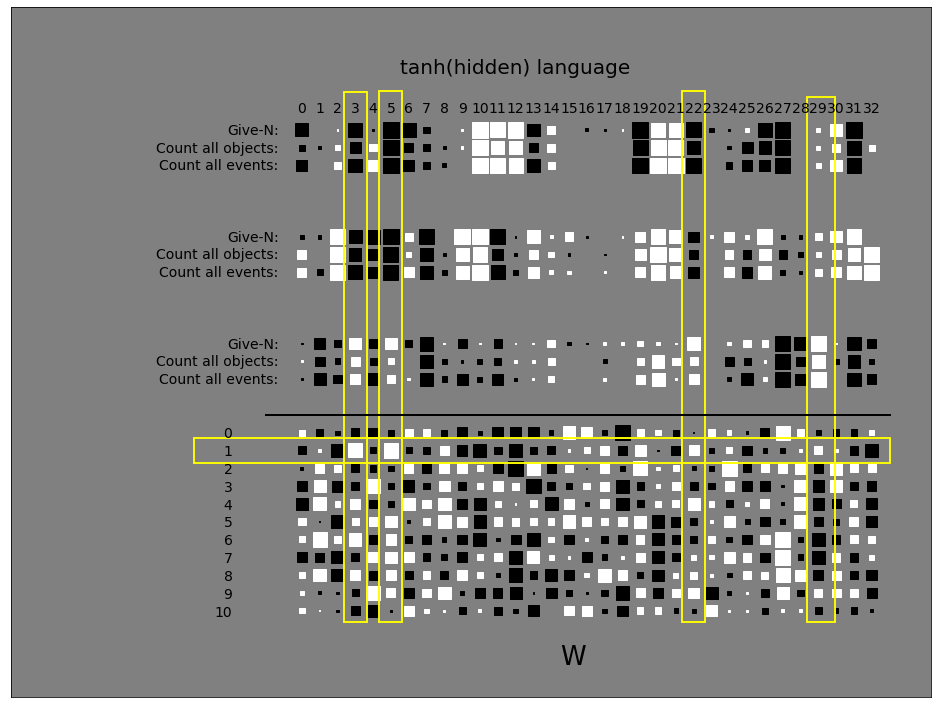

In [156]:
multiple_graph_lists = [graph_list_count_all_events, graph_list_count_all_objects, graph_list_give_n]
#for n in range(1,4):
asked_numbers=[1,2,3]
#asked_numbers=[1]

nodes_get_turned_on_from_1_to_2 = [2,13,30,31,32]
nodes_get_turned_off_from_1_to_2 = [3,5,22,29]

nodes_get_turned_on_from_7_to_8 = [1,3,7,9,17,21,26,28]
nodes_get_turned_off_from_7_to_8 = [3,5,13,31]

fig = hinton_from_multiple_graph_lists(multiple_graph_lists, 
                                       asked_numbers=asked_numbers, 
                                       layers=(7,8),
                                       axis=None, figy=None, 
                                       weight_encoding='size',
                                       max_weight=None,
                                      highlight_number=nodes_get_turned_off_from_1_to_2,
                                      highlight_output_number=[1])


PATH = RESULTS_PATH + 'ALIFE_paper/num_repr_count_all_objects.eps'
fig.savefig(PATH, format='eps')

In [11]:
multiple_graph_lists[0].graph_list[0].layer_descriptions[2]

('Prev Cell', [array(27), 19.8])

In [ ]:
# Lang-LSTM + Lang-output
add_layer(self.own_G, 0, activations = input_lang.tolist(),stacked_description_lilayer_description='Input')            
add_layer(self.own_G, 1, activations = remember_gate_lang.tolist(),layer_description='Remember-gate')
add_layer(self.own_G, 2, activations = prev_cell_lang.tolist(),layer_description='Prev Cell', layer_operation='x')
add_layer(self.own_G, 3, activations = in_gate_lang.tolist(),layer_description='In-Gate', layer_operation='+')
add_layer(self.own_G, 4, activations = cell_gate_lang.tolist(),layer_description='Cell-Gate', layer_operation='x')

add_layer(self.own_G, 5, activations = torch.tanh(self.cell_lang).tolist(),layer_description='tanh(Cell)', layer_operation='=')
add_layer(self.own_G, 6, activations = out_gate_lang.tolist(),layer_description='Out gate', layer_operation='x')     
add_layer(self.own_G, 7, activations = torch.tanh(self.hidden_lang).tolist(),layer_description='tanh(hidden) language', layer_operation='x')
add_layer(self.own_G, 8, activations = stacked_output_lang.tolist(),node_description_list=output_description_list, description_pos='middle right',layer_description='Output')

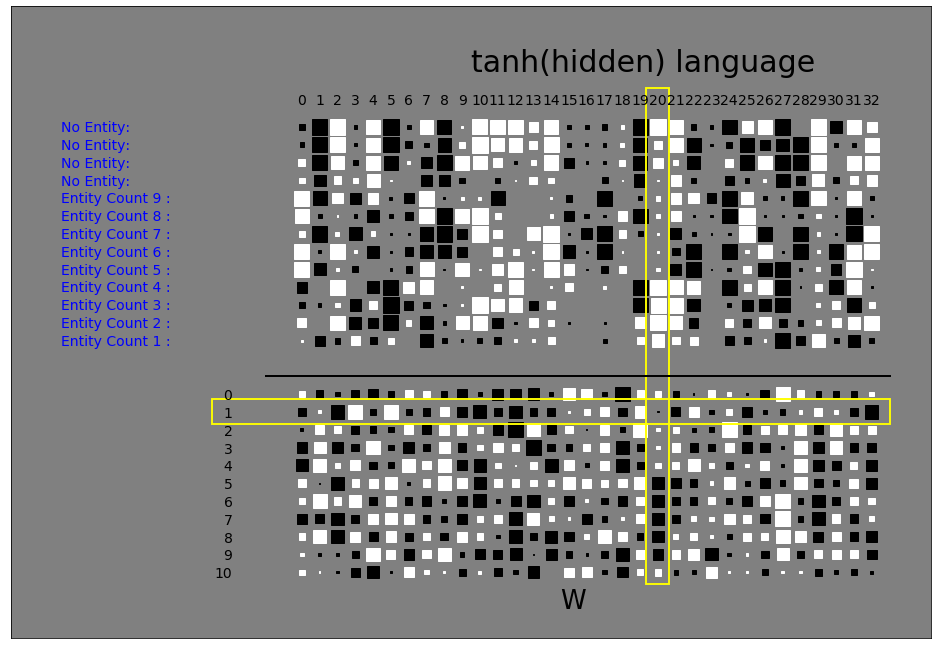

In [66]:
multiple_graph_lists = [graph_list_count_all_objects]

############################
## Plot Hinton diagrams
############################
asked_numbers=[1,2,3,4,5,6,7,8,9,'no_count', 'no_count', 'no_count','no_count']
fig = hinton_from_multiple_graph_lists(multiple_graph_lists, 
                                       asked_numbers=asked_numbers, 
                                       layers=(7,8),
                                       axis=None, 
                                       figy=None, 
                                       weight_encoding='size',
                                       max_weight=None,
                                      highlight_number=[20],
                                      highlight_output_number=[1])
#highlight_number=[20,51,56,29,17,38]
PATH = RESULTS_PATH + 'ALIFE_paper/entity_repr_count_all_objects.eps'
fig.savefig(PATH, format='eps')

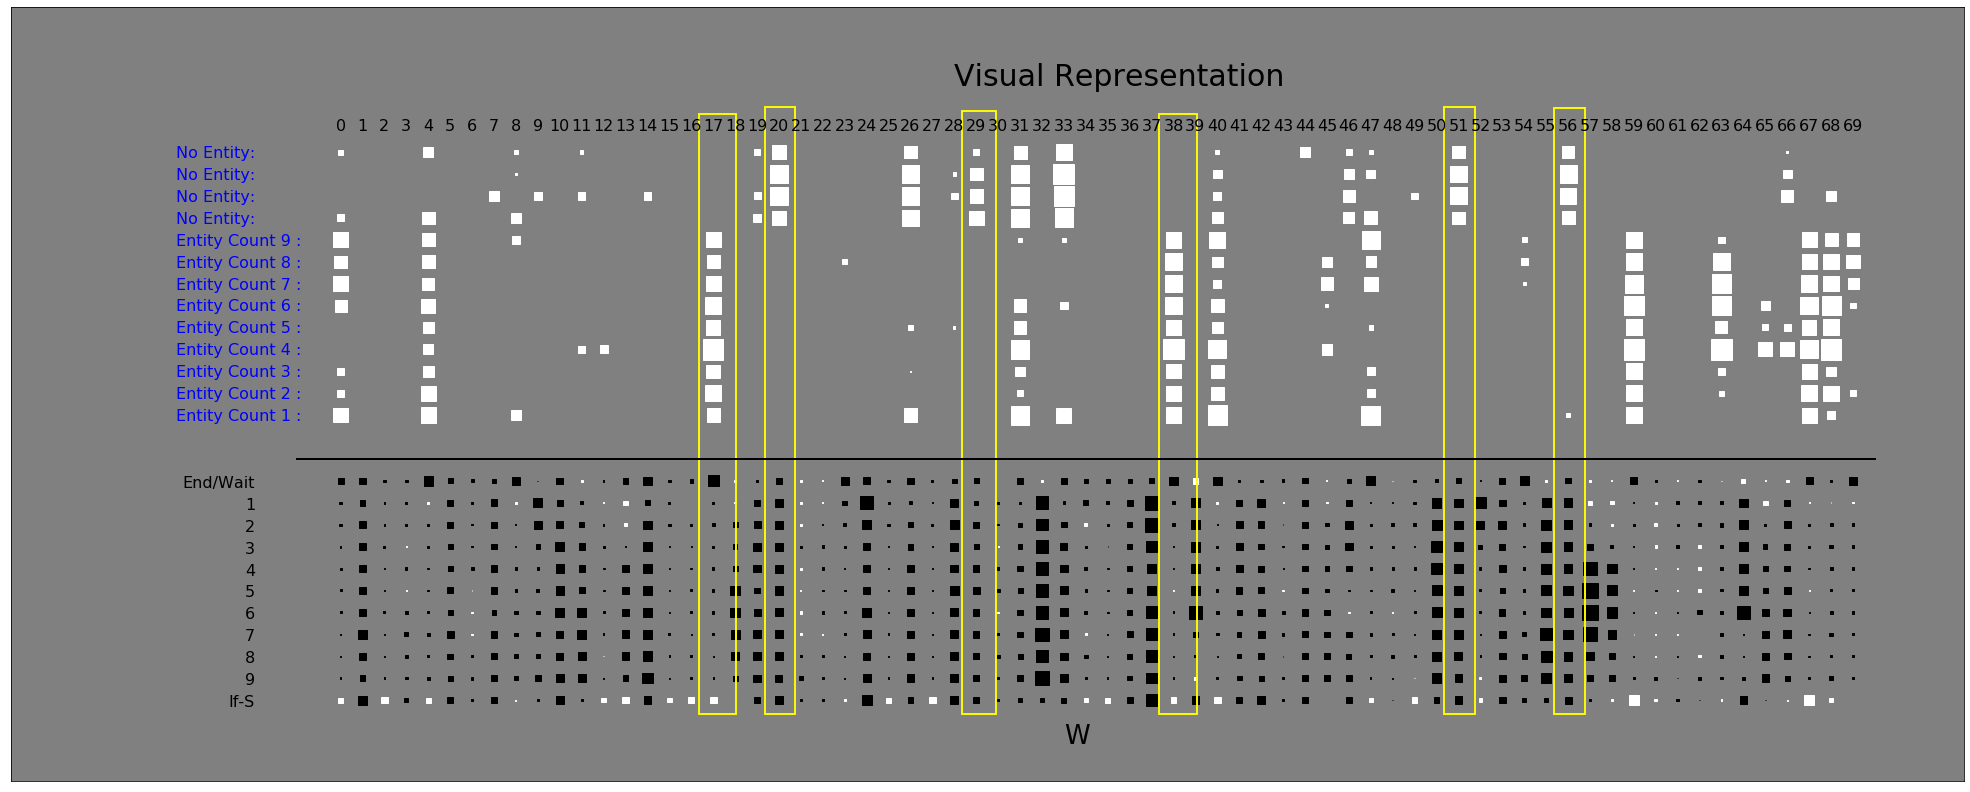

In [831]:
multiple_graph_lists = [graph_list_count_all_objects]

############################
## Plot Hinton diagrams
############################
asked_numbers=[1,2,3,4,5,6,7,8,9,'no_count', 'no_count', 'no_count','no_count']
fig = hinton_from_multiple_graph_lists(multiple_graph_lists, 
                                       asked_numbers=asked_numbers, 
                                       layers=(1,2),
                                       axis=None, 
                                       figy=None, 
                                       weight_encoding='size',
                                       max_weight=None,
                                      highlight_number=[20,51,56,29,17,38])

PATH = RESULTS_PATH + 'ALIFE_paper/entity_repr_count_all_objects.eps'
fig.savefig(PATH, format='eps')

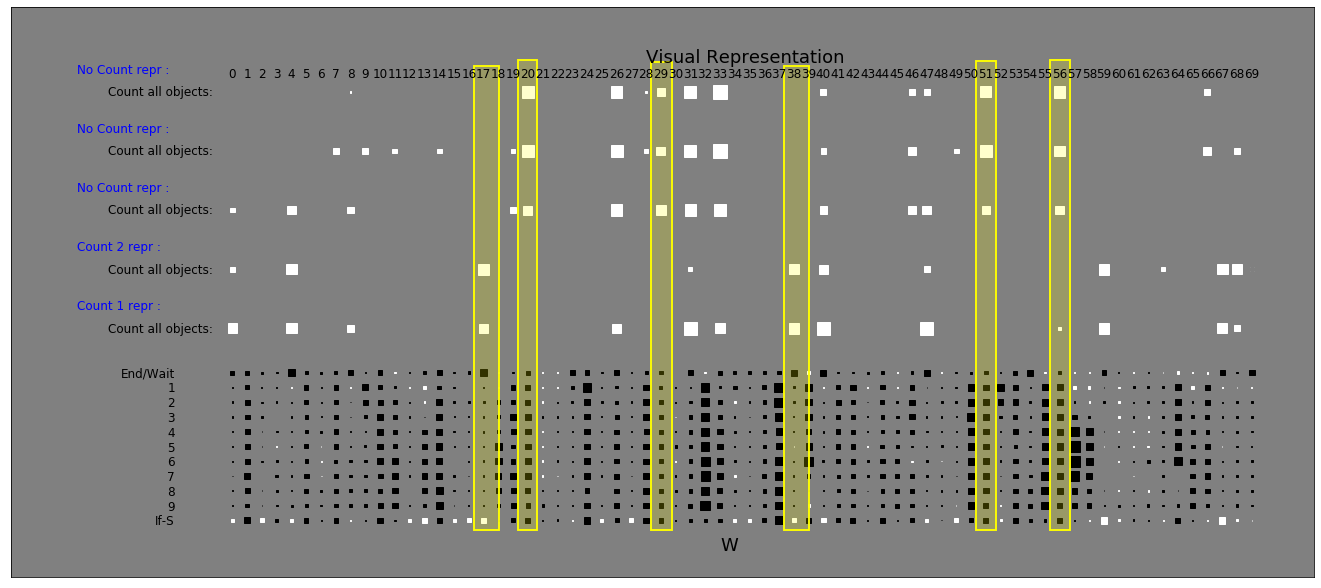

In [285]:
multiple_graph_lists = [graph_list_count_all_objects]

############################
## Plot Hinton diagrams
############################
asked_numbers=[1,2,'no_count', 'no_count', 'no_count']
fig = hinton_from_multiple_graph_lists(multiple_graph_lists, 
                                       asked_numbers=asked_numbers, 
                                       layers=(1,2),
                                       axis=None, 
                                       figy=None, 
                                       weight_encoding='size',
                                       max_weight=None,
                                      highlight_number=[20,51,56,29,17,38])

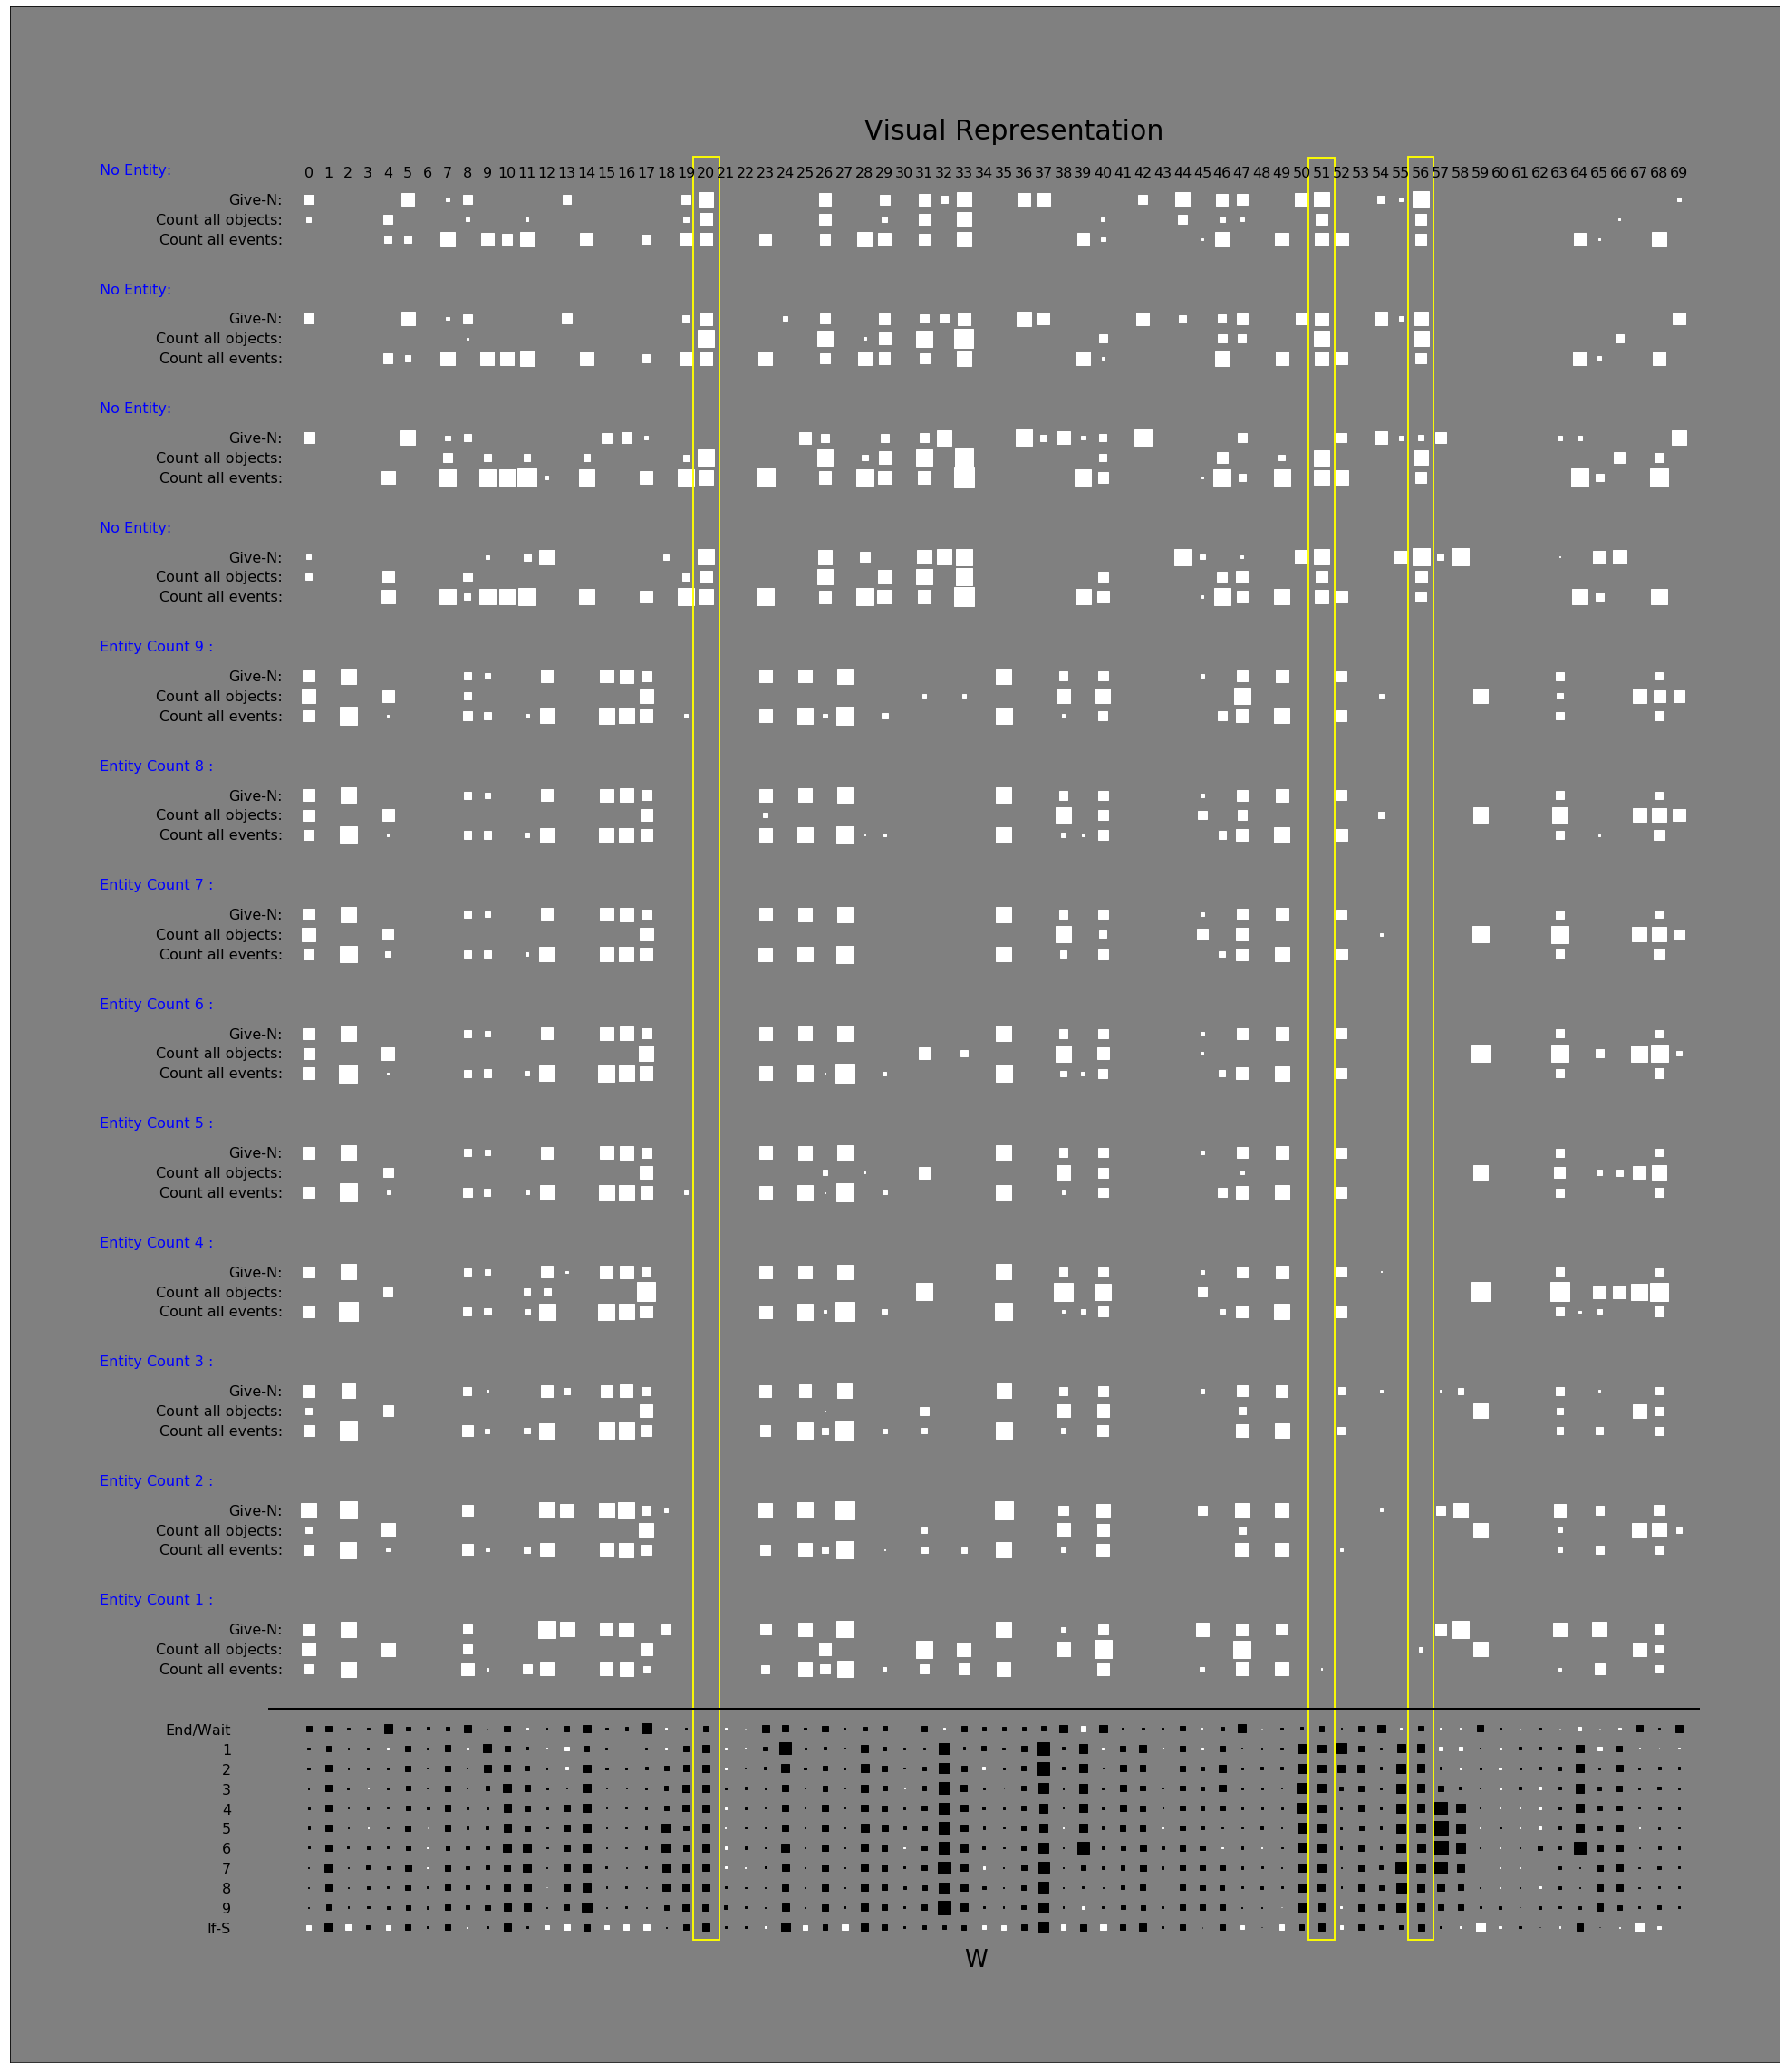

In [832]:
multiple_graph_lists = [graph_list_count_all_events, graph_list_count_all_objects, graph_list_give_n]
############################
## Plot Hinton diagrams
############################
asked_numbers=[1,2,3,4,5,6,7,8,9,'no_count', 'no_count', 'no_count', 'no_count']
fig = hinton_from_multiple_graph_lists(multiple_graph_lists, 
                                       asked_numbers=asked_numbers, 
                                       layers=(1,2),
                                       axis=None, 
                                       figy=None, 
                                       weight_encoding='size',
                                       max_weight=None,
                                      highlight_number=[20,51,56])

PATH = RESULTS_PATH + 'ALIFE_paper/entity_repr_all_tasks.eps'
fig.savefig(PATH, format='eps')

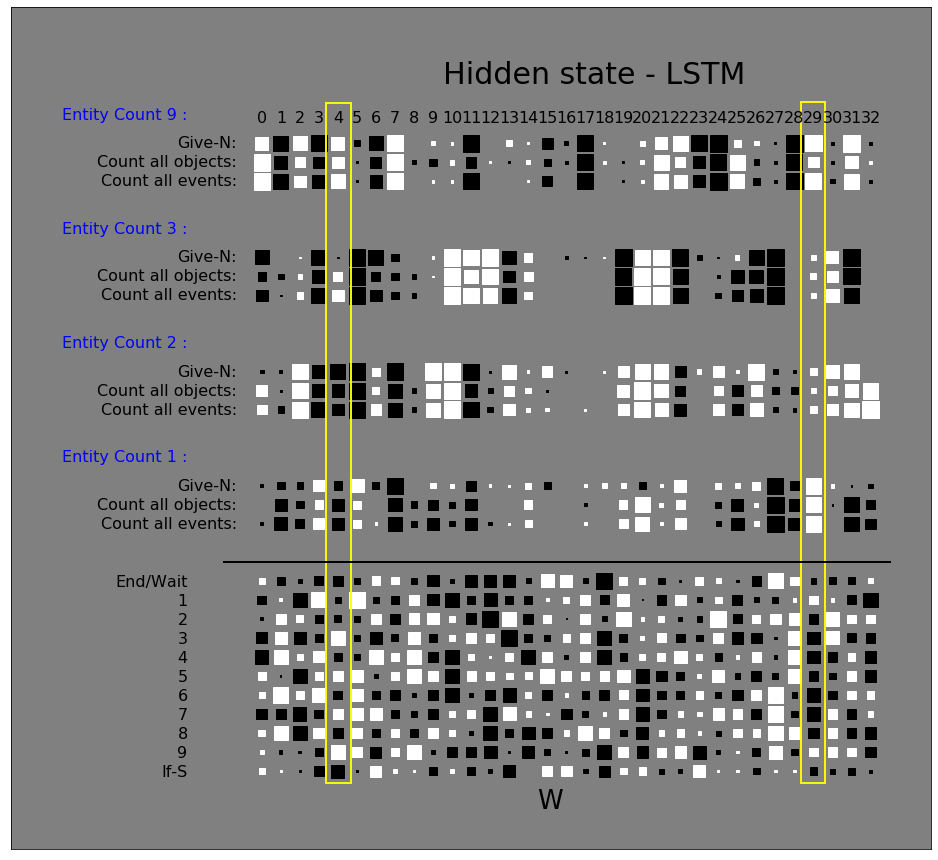

In [830]:
multiple_graph_lists = [graph_list_count_all_events, graph_list_count_all_objects, graph_list_give_n]
#for n in range(1,4):
asked_numbers=[1,2,3,9]
#asked_numbers=[1]
fig = hinton_from_multiple_graph_lists(multiple_graph_lists, 
                                       asked_numbers=asked_numbers, 
                                       layers=(0,2),
                                       axis=None, figy=None, 
                                       weight_encoding='size',
                                       max_weight=None,
                                      highlight_number=[29, 4])

PATH = RESULTS_PATH + 'ALIFE_paper/num_repr_count_all_objects.eps'
fig.savefig(PATH, format='eps')

In [552]:
#######################
### Get tuning curve
####################


task_list=["count_all_events", "count_all_objects", "give_n"]
n_tests=5
n_squares=9
layers=[0,1,2]
neuron_n = 51 #20


def get_df_from_test_trials(task_list, n_tests, n_squares, layers, neuron_n):
    
    df = pd.DataFrame()
    for tasky in task_list:

        for n in range(n_tests):
            graph_list = get_graph_from_task_trial(PATH, tasky, n_squares)
            graph_list_instance = GraphListClass(graph_list, readable_task[tasky])
            for a in range(1,10):
                #print(tasky)
                #print(a)
                if(len(graph_list_instance.time_steps_count_and_no_count[a])>0):
                    time_step = graph_list_instance.time_steps_count_and_no_count[a][0]

                    for layer in layers:
                        input_nodes = graph_list_instance.node_activations[layer][time_step]
                        graphy = graph_list_instance.graph_list[0]
                        layer_description = graphy.layer_descriptions[layer][0]
                        #if(len(graphy.txt)>0):
                        #    node_names = np.asarray([graphy.txt[i] for i in graphy.nodes_in_layer[layer]])
                        #if(len(graphy.txt)>0):
                        #    node_names = np.asarray([graphy.txt[i] for i in graphy.nodes_in_layer[layer]])
                        #else:
                        #    node_names = [" "]*len(graphy.nodes_in_layer[layer])

                        for neuron_n in range(input_nodes.size):
                            node_activity= input_nodes[neuron_n]
                            df_ = pd.DataFrame(
                                    {
                                        "task": tasky,
                                        "asked_number": str(a),
                                        "neuron_n": [neuron_n],
                                        "node_activities": [node_activity],
                                        "layer": layer,
                                        "layer_name": layer_description,
                                        "node_activities_vector": [np.array(input_nodes)]
                                    })
                            df = df.append(df_)

            for layer in layers:
                a='no_count'    
                n_a = random.randint(0,len(graph_list_instance.time_steps_count_and_no_count[a])-1)
                time_step = graph_list_instance.time_steps_count_and_no_count[a][n_a]
                input_nodes = graph_list_instance.node_activations[layer][time_step]

                graphy = graph_list_instance.graph_list[0]
                layer_description = graphy.layer_descriptions[layer]

                for neuron_n in range(input_nodes.size):
                    node_activity= input_nodes[neuron_n]
                    df_ = pd.DataFrame(
                            {
                                "task": tasky,
                                "asked_number": str(a),
                                "neuron_n": [neuron_n],
                                "node_activities": [node_activity],
                                "layer": layer,
                                "node_activities_vector": [np.array(input_nodes)]
                            })
                    df = df.append(df_)
    return df
        

In [561]:
df_new_1 = get_df_from_test_trials(task_list, 2, n_squares, layers, neuron_n)

<Figure size 864x864 with 0 Axes>

In [744]:
df_new_2 = get_df_from_test_trials(task_list, 10, n_squares, layers, neuron_n)

C:\Programs\Anaconda3\lib\site-packages\torch\nn\functional.py:1351: UserWarning:

nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.



<Figure size 864x864 with 0 Axes>

In [454]:
df_new['task'].unique()

array(['count_all_events', 'count_all_objects', 'give_n'], dtype=object)

In [551]:
print(df_new_1[(df_new_1.task=='give_n') & (df_new_1.asked_number=='1')].head()) #node_activities_vector.values

     task asked_number  neuron_n  node_activities  layer           layer_name  \
0  give_n            1         0            -0.01      0  Hidden state - LSTM   
0  give_n            1         1            -0.33      0  Hidden state - LSTM   
0  give_n            1         2            -0.10      0  Hidden state - LSTM   
0  give_n            1         3             0.43      0  Hidden state - LSTM   
0  give_n            1         4            -0.29      0  Hidden state - LSTM   

                              node_activities_vector  
0  [-0.01, -0.33, -0.1, 0.43, -0.29, 0.39, -0.21,...  
0  [-0.01, -0.33, -0.1, 0.43, -0.29, 0.39, -0.21,...  
0  [-0.01, -0.33, -0.1, 0.43, -0.29, 0.39, -0.21,...  
0  [-0.01, -0.33, -0.1, 0.43, -0.29, 0.39, -0.21,...  
0  [-0.01, -0.33, -0.1, 0.43, -0.29, 0.39, -0.21,...  


In [575]:
def get_node_activity_vector(df, task, asked_number, layer):
    return df[(df_new_1.task==task) & (df.asked_number==asked_number)& (df.layer==layer)& (df.neuron_n==0)].node_activities_vector

In [725]:
df = df_new_1
task = 'give_n'
asked_number = '1'
layer = 0

nodes = get_node_activity_vector(df, task, asked_number, layer)
print(nodes)

TypeError: get_node_activity_vector() missing 2 required positional arguments: 'class_instance' and 'layer'

In [554]:
corr = df_new_1[(df_new_1.task=='give_n') & (df_new_1.asked_number=='1')].node_activities_vector.corr(df_new_1[(df_new_1.task=='give_n') & (df_new_1.asked_number=='1')].node_activities_vector)
print(corr)

TypeError: operands could not be broadcast together with shapes (33,) (70,) 

In [224]:
df[df.task==tasky].groupby('asked_number').node_activities.std().values

array([0.90827561, 1.0233176 , 1.22929933, 1.34068874, 1.36155909,
       1.36507702, 1.3654508 , 1.36608141, 1.36608141, 2.21121404])

In [ ]:
font_size_legend = 15
font_size_axis_label = 15
font_size_axis_ticks = 15

fig, ax = plt.subplots(figsize=(16,10) )
for tasky in task_list:
    errs = df[df.task==tasky].groupby('asked_number').node_activities.std().values
    means = df[df.task==tasky].groupby('asked_number').node_activities.mean().values
    ax.errorbar(df[df.task==tasky].asked_number.unique(), means, yerr=errs, barsabove=True,capsize=5, label=tasky)
    #ax = df[df.task==tasky].groupby('asked_number').node_activities.mean().plot(yerr=errs,xticks=range(11), label=tasky,fmt='ro-')
    #ax = df[df.task==tasky].groupby('asked_number').node_activities.std().plot(kind='bar',xticks=range(11), label=tasky)
    #plt.errorbar(df[df.task==tasky].groupby('asked_number').node_activities.std(), range(11))
    
ax.legend(prop={'size': font_size_legend})   
ax.xaxis.set_tick_params(labelsize=font_size_axis_ticks)
ax.yaxis.set_tick_params(labelsize=font_size_axis_ticks)
ax.set_xlabel("Output count words",fontsize=font_size_axis_label)
ax.set_ylabel("Node activity",fontsize=font_size_axis_label)

In [264]:
df[(df.task==tasky) & (df.neuron_n==51)].head(300)

,task,asked_number,neuron_n,node_activities
0,give_n,1,51,0.00
0,give_n,2,51,0.00
0,give_n,3,51,0.00
0,give_n,4,51,0.00
0,give_n,5,51,0.00
0,give_n,6,51,0.00
0,give_n,7,51,0.00
0,give_n,8,51,0.00
0,give_n,9,51,0.00
0,give_n,no_count,51,4.64


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


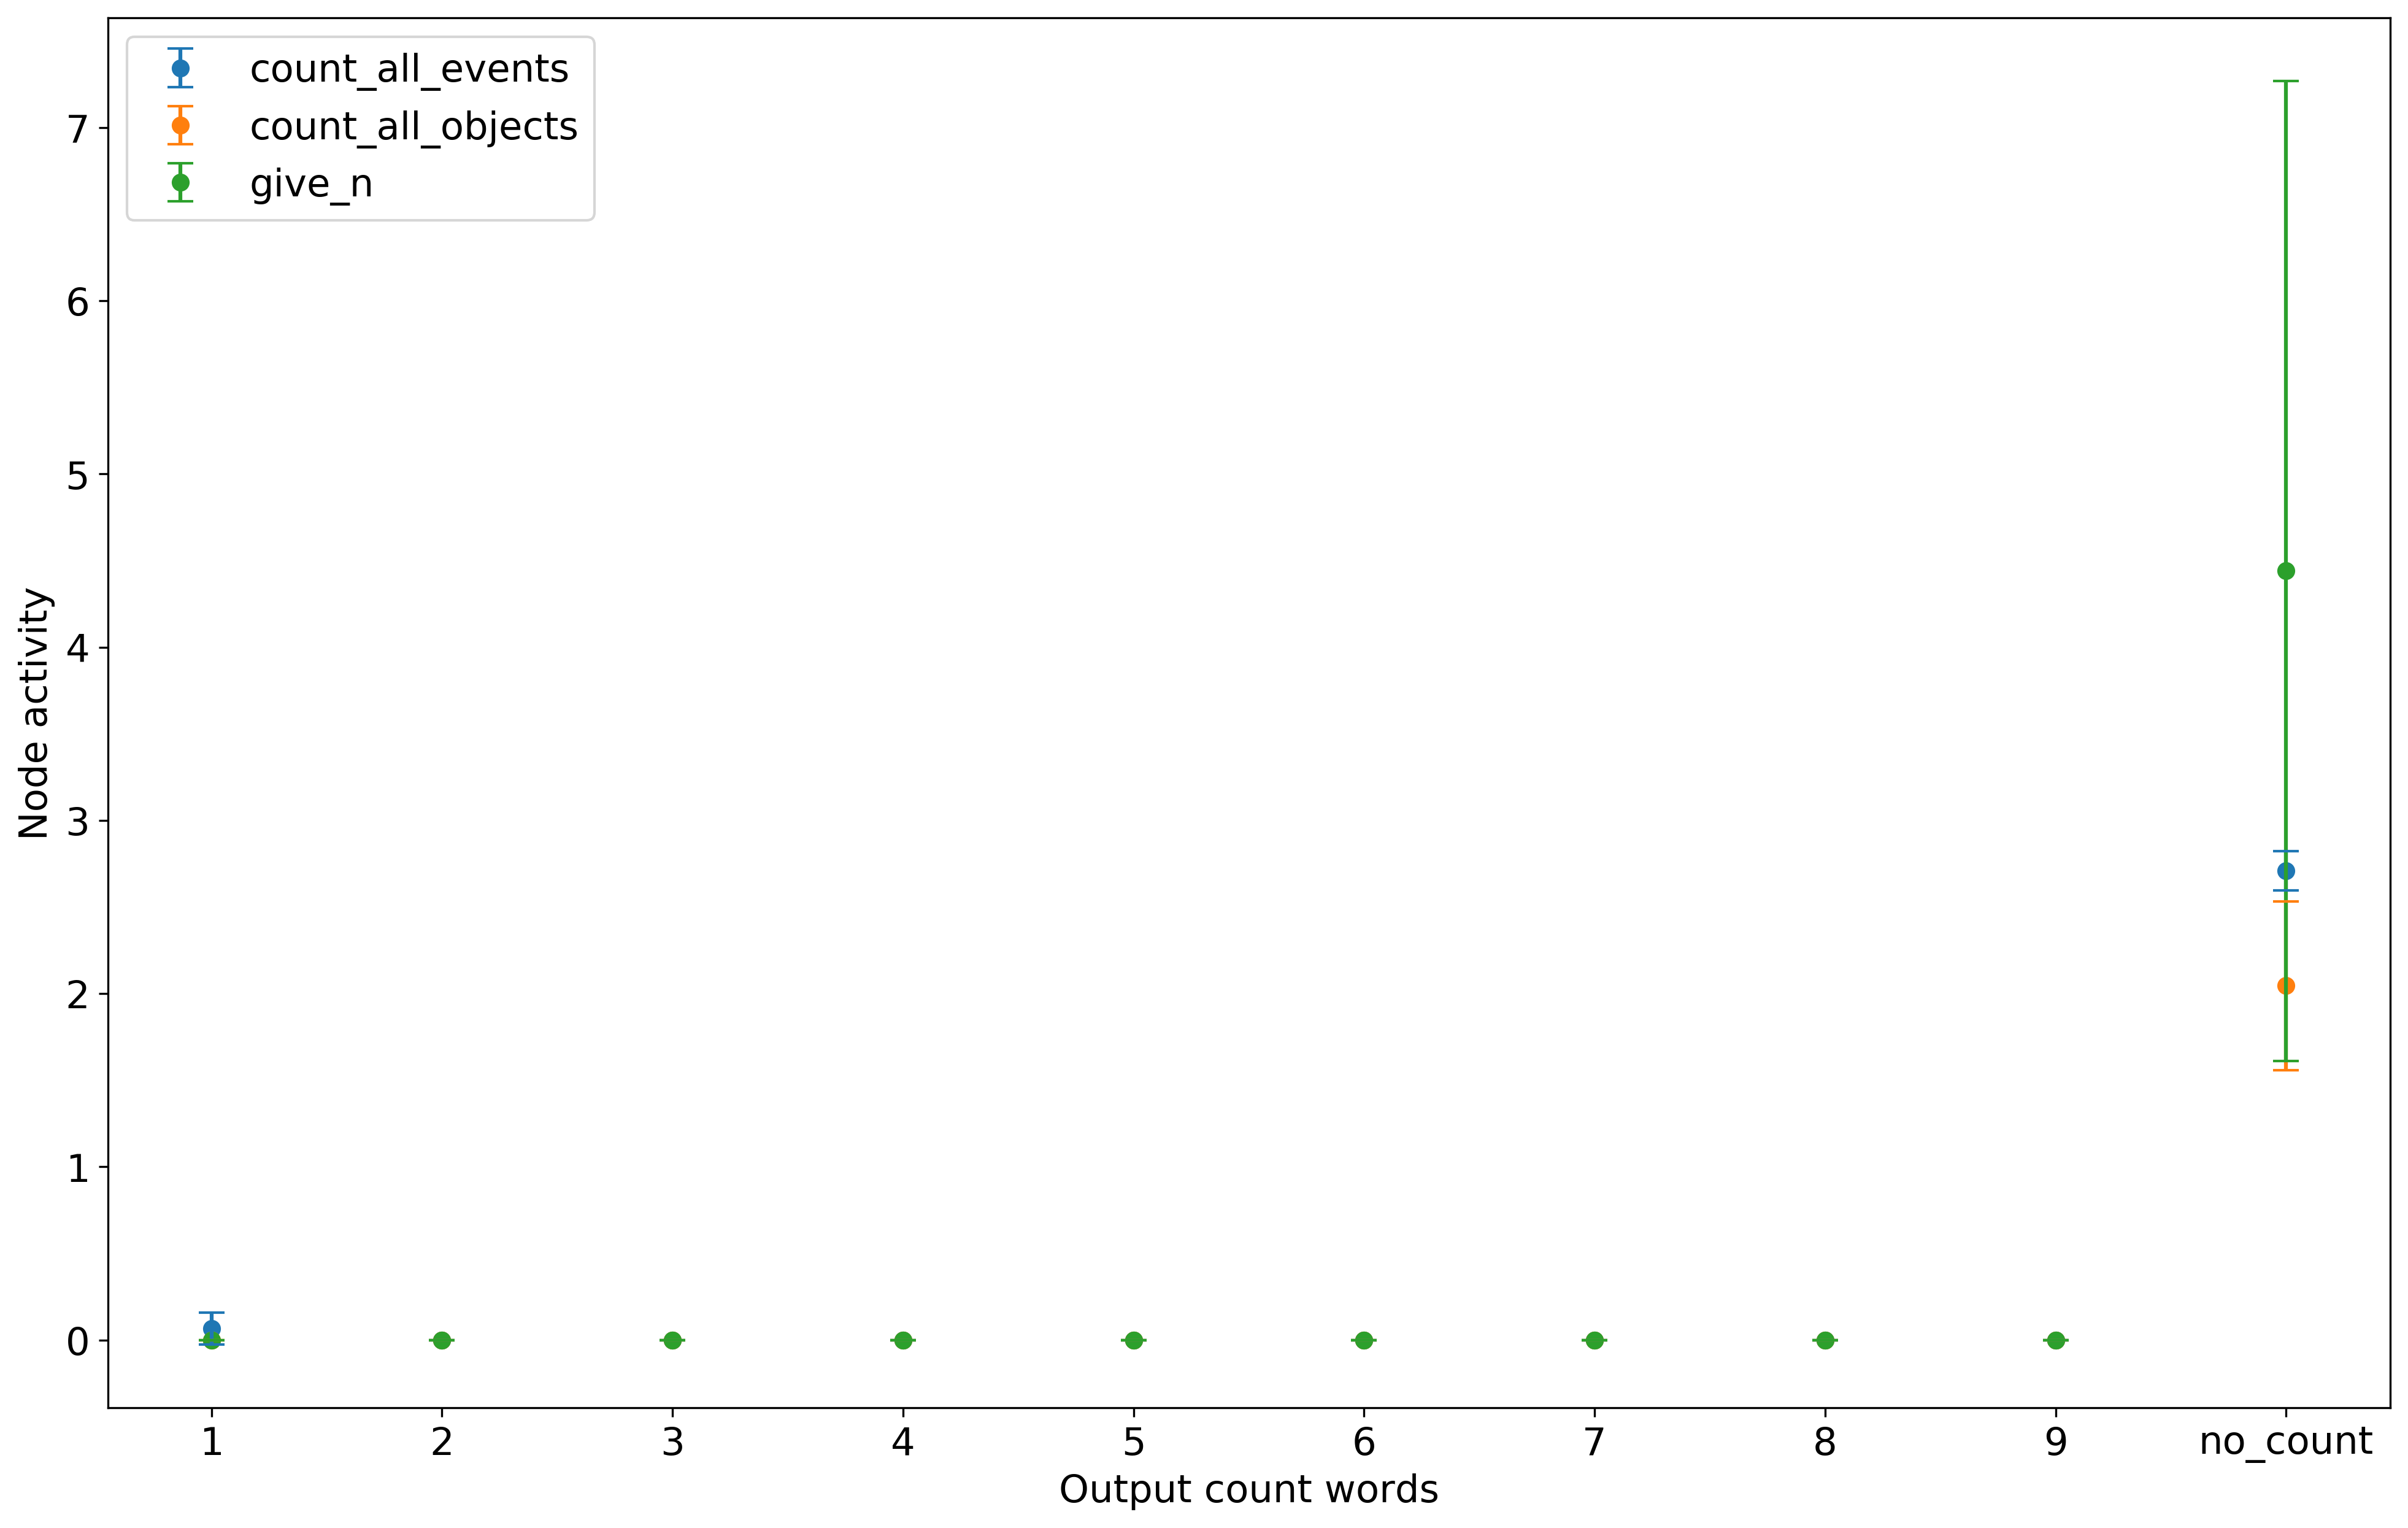

In [833]:
neuron_n=51

font_size_legend = 15
font_size_axis_label = 15
font_size_axis_ticks = 15

fig, ax = plt.subplots(figsize=(16,10), dpi=300 )
for tasky in task_list:
    errs = df[(df.task==tasky) & (df.neuron_n==neuron_n)].groupby('asked_number').node_activities.std().values
    means = df[(df.task==tasky) & (df.neuron_n==neuron_n)].groupby('asked_number').node_activities.mean().values
    ax.errorbar(df[(df.task==tasky) & (df.neuron_n==neuron_n)].asked_number.unique(), 
                means, 
                yerr=errs, 
                barsabove=True,
                capsize=5, 
                label=tasky,
                marker='o', linestyle='None')
    #ax = df[df.task==tasky].groupby('asked_number').node_activities.mean().plot(yerr=errs,xticks=range(11), label=tasky,fmt='ro-')
    #ax = df[df.task==tasky].groupby('asked_number').node_activities.std().plot(kind='bar',xticks=range(11), label=tasky)
    #plt.errorbar(df[df.task==tasky].groupby('asked_number').node_activities.std(), range(11))
    
ax.legend(prop={'size': font_size_legend})   
ax.xaxis.set_tick_params(labelsize=font_size_axis_ticks)
ax.yaxis.set_tick_params(labelsize=font_size_axis_ticks)
ax.set_xlabel("Output count words",fontsize=font_size_axis_label)
ax.set_ylabel("Node activity",fontsize=font_size_axis_label)


PATH = RESULTS_PATH + 'ALIFE_paper/abstract_entity_node_across_nums.eps'
fig.savefig(PATH, format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


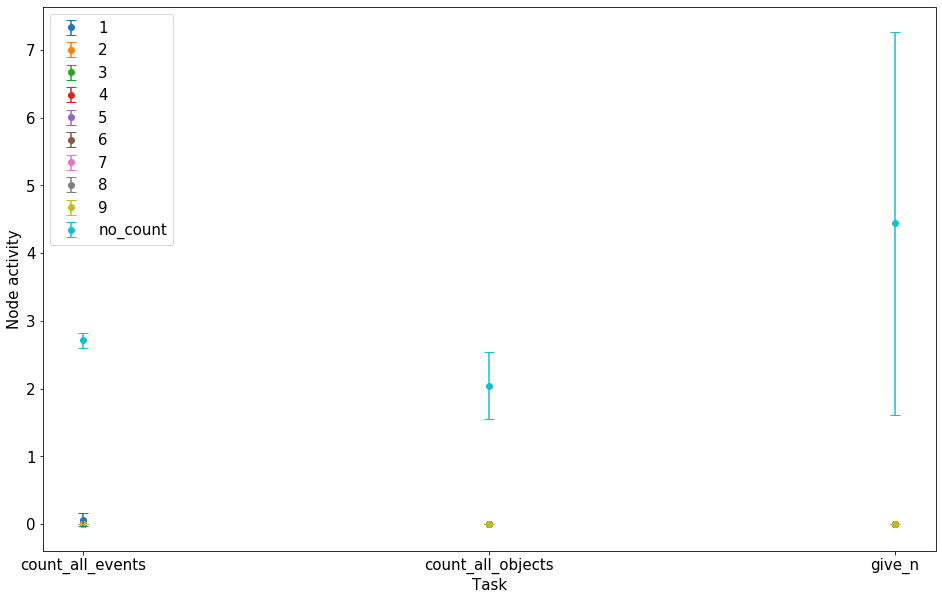

In [834]:
font_size_legend = 15
font_size_axis_label = 15
font_size_axis_ticks = 15

fig, ax = plt.subplots(figsize=(16,10) )
for a in df.asked_number.unique():
    errs = df[(df.asked_number==a) & (df.neuron_n==neuron_n)].groupby('task').node_activities.std().values
    means = df[(df.asked_number==a) & (df.neuron_n==neuron_n)].groupby('task').node_activities.mean().values
    ax.errorbar(df[(df.asked_number==a) & (df.neuron_n==neuron_n)].task.unique(), 
                means, 
                yerr=errs, 
                barsabove=True,
                capsize=5, 
                label=a,
                marker='o', linestyle='None')
    #ax = df[df.task==tasky].groupby('asked_number').node_activities.mean().plot(yerr=errs,xticks=range(11), label=tasky,fmt='ro-')
    #ax = df[df.task==tasky].groupby('asked_number').node_activities.std().plot(kind='bar',xticks=range(11), label=tasky)
    #plt.errorbar(df[df.task==tasky].groupby('asked_number').node_activities.std(), range(11))
    
ax.legend(prop={'size': font_size_legend}, loc='upper left')   
ax.xaxis.set_tick_params(labelsize=font_size_axis_ticks)
ax.yaxis.set_tick_params(labelsize=font_size_axis_ticks)
ax.set_xlabel("Task",fontsize=font_size_axis_label)
ax.set_ylabel("Node activity",fontsize=font_size_axis_label)

PATH = RESULTS_PATH + 'ALIFE_paper/abstract_entity_node_across_tasks.eps'
fig.savefig(PATH, format='eps')

In [177]:
for a in df.asked_number.unique():
    print(a)

1
2
3
4
5
6
7
8
9
no_count


In [294]:
df.corr(method='pearson')

,neuron_n,node_activities
neuron_n,1.00000,-0.09988
node_activities,-0.09988,1.00000


In [298]:
df.asked_number.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'no_count'],
      dtype=object)

In [331]:
df.corr()

,neuron_n,node_activities
neuron_n,1.00000,-0.09988
node_activities,-0.09988,1.00000


In [351]:
df_test = pd.DataFrame({
    'task': 'count_all_events',
    'asked_number': 1,
    'vector': [3,-2,1]
})

df_test2 = pd.DataFrame({
    'task': 'count_all_events',
    'asked_number': 2,
    'vector': [-3,2,-1]
})

df_test3 = pd.DataFrame({
    'task': 'give_n',
    'asked_number': 1,
    'vector': [-3,2,-1]
})

df_test4 = pd.DataFrame({
    'task': 'give_n',
    'asked_number': 2,
    'vector': [-3,2,-1]
})

df_test = df_test.append(df_test2)
df_test = df_test.append(df_test3)
df_test = df_test.append(df_test4)

#print(df_test.vector)
print(df_test[df_test.task=='give_n'].vector.values)

corry = df_test[df_test.task=='count_all_events'].vector.corr(df_test[df_test.task=='give_n'].vector)
corry = df_test[(df_test.task=='count_all_events') & (df_test.asked_number==i)].vector.corr(df_test[(df_test.task=='count_all_events') & (df_test.asked_number==i)].vector)
print(corry)
df_test.corr()

[-3  2 -1 -3  2 -1]
1.0


,asked_number,vector
asked_number,1.000000,-0.156174
vector,-0.156174,1.000000


In [363]:
df_test['asked_number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'no_count'],
      dtype=object)

In [615]:
## Get correlations-matrix from your specific dataframe:
# by giving the one class that stays the same (within_class) and one that you want to check for/vary (check_class)

within_class = 'task'
within_class_instance = 'count_all_events'
check_class = 'asked_number'
df_test = df
layer=0

def get_correlation_matrix(df_test,within_class,within_class_instance,check_class,layer,plot=False,ax=None ):
    first,second=df_test[check_class].unique(),df_test[check_class].unique()
    var_len = len(first)
    range_var_len = range(var_len)

    combined = [(f,s) for f in range_var_len for s in range_var_len]

    corr_matrix = np.empty([var_len,var_len ])
    for (i,j) in combined: 
        i_class_instance=df_test[check_class].unique()[i]
        j_class_instance=df_test[check_class].unique()[j]
        corry = df_test[(df_test[within_class]==within_class_instance) & (df_test[check_class]==i_class_instance) & (df_test['layer']==layer)].node_activities.corr(df_test[(df_test[within_class]==within_class_instance) & (df_test[check_class]==j_class_instance) & (df_test['layer']==layer)].node_activities, method='pearson')
        corr_matrix[i,j] = corry
    
    sub_title = " "
    if(within_class=='task'):
        sub_title += "for the task " + readable_task[within_class_instance]
    if(within_class=='asked_number'):
        sub_title += "when Number " + within_class_instance + " is counted"
        
    title=df_new[df_new['layer']==layer].layer_name.unique()[0] + "\n Layer correlation" + "\n " + sub_title
    tick_labels = df_test[check_class].unique()
    if(ax is None):
        ax = plt.axes()
    sb.heatmap(corr_matrix, 
                xticklabels=tick_labels,
                yticklabels=tick_labels,
                cmap='RdBu_r',
                annot=True,
                linewidth=0.5,
                  ax=ax)

    ax.set_title(title)
    
    
    return corr_matrix


In [715]:
## Get correlations-matrix from your specific dataframe:
# by giving the one class that stays the same (within_class) and one that you want to check for/vary (check_class)

within_class = 'task'
within_class_instance = 'count_all_events'
check_class = 'asked_number'
df_test = df
layer=0

def get_correlation_matrix(df_test,within_class,within_class_instance,check_class,layer,plot=False,ax=None ):
    first,second=df_test[check_class].unique(),df_test[check_class].unique()
    var_len = len(first)
    range_var_len = range(var_len)

    combined = [(f,s) for f in range_var_len for s in range_var_len]

    corr_matrix = np.empty([var_len,var_len ])
    for (i,j) in combined: 
        i_class_instance=df_test[check_class].unique()[i]
        j_class_instance=df_test[check_class].unique()[j]
        try:
            vec1 = get_node_activity_vector(df_test, within_class, within_class_instance, check_class, i_class_instance, layer).values[0]
        except IndexError:
            print(within_class, within_class_instance, check_class, i_class_instance, layer)
        vec2 = get_node_activity_vector(df_test, within_class, within_class_instance, check_class, j_class_instance, layer).values[0]
        #corry = df_test[(df_test[within_class]==within_class_instance) & (df_test[check_class]==i_class_instance) & (df_test['layer']==layer)].node_activities.corr(df_test[(df_test[within_class]==within_class_instance) & (df_test[check_class]==j_class_instance) & (df_test['layer']==layer)].node_activities, method='pearson')
        corry = np.corrcoef(vec1, vec2)[0, 1]
        corr_matrix[i,j] = corry
    
    sub_title = " "
    if(within_class=='task'):
        sub_title += "for the task " + readable_task[within_class_instance]
    if(within_class=='asked_number'):
        sub_title += "when Number " + within_class_instance + " is counted"
        
    title=df_new[df_new['layer']==layer].layer_name.unique()[0] + "\n Layer correlation" + "\n " + sub_title
    tick_labels = df_test[check_class].unique()
    if(ax is None):
        ax = plt.axes()
    sb.heatmap(corr_matrix, 
                xticklabels=tick_labels,
                yticklabels=tick_labels,
                cmap='RdBu_r',
                linewidth=0.5,
                  ax=ax,
              vmin=-0.2,
              vmax=1.0,
              annot=False)

    ax.set_title(title)
    
    
    return corr_matrix



In [756]:
corry = np.corrcoef(np.array([3.53, 0.  , 0.  , 0.  , 2.16, 0.  , 0.  , 0.  , 0.62, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.87, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 2.29, 0.  , 1.46, 0.  , 0.  , 0.  ,
       0.  , 0.08, 0.  , 3.82, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 2.62,
       0.  , 0.  , 0.  , 0.  , 2.65, 0.  , 0.  , 0.  , 1.93, 0.  , 0.  ,
       0.  , 2.41, 0.69, 3.01]), np.array([0.9 , 0.  , 0.  , 0.  , 0.49, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.08, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.31, 0.  , 0.  , 0.  , 0.  , 1.34, 0.  , 1.05, 0.  , 0.  , 0.  ,
       0.  , 0.44, 0.  , 0.8 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 1.61, 0.  , 0.  , 0.  , 1.59, 0.  , 0.  ,
       0.  , 1.61, 1.79, 0.95]))[0, 1]
print(corry)

0.7558740685075022


In [758]:
df_test[(df_test['asked_number']=='2') & (df_test['task']=='count_all_objects') & (df_test['layer']==1)& (df_test['neuron_n']==0)].node_activities_vector.values[1]

array([0.9 , 0.  , 0.  , 0.  , 0.49, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.08, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.31, 0.  , 0.  , 0.  , 0.  , 1.34, 0.  , 1.05, 0.  , 0.  , 0.  ,
       0.  , 0.44, 0.  , 0.8 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 1.61, 0.  , 0.  , 0.  , 1.59, 0.  , 0.  ,
       0.  , 1.61, 1.79, 0.95])

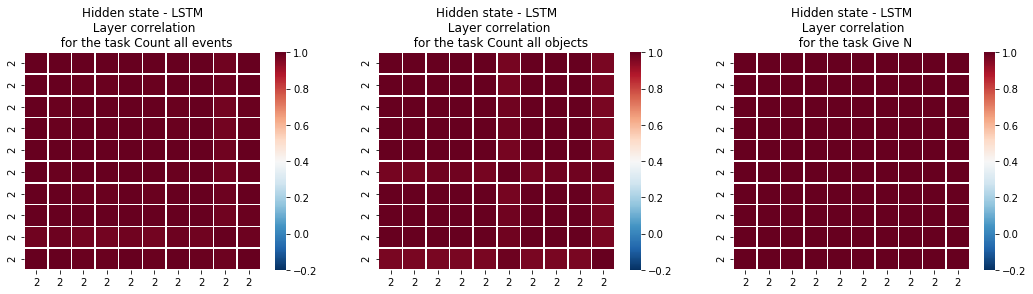

In [835]:
df_test = df_new_2
within_class_1,within_class_instance_1,within_class_2,within_class_instance_2 = 'asked_number','2', 'task', 'count_all_events'
layer=0

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

corr_matrix_same_numb_same_task = []


corr_matrix_same_numb_same_task_1 = get_correlation_matrix_within_all_same_classes_diff_trials(df_test,within_class_1,within_class_instance_1,within_class_2,within_class_instance_2,plot=True,ax=ax[0] )

within_class_instance_2 = 'count_all_objects'
corr_matrix_same_numb_same_task_2 = get_correlation_matrix_within_all_same_classes_diff_trials(df_test,within_class_1,within_class_instance_1,within_class_2,within_class_instance_2,plot=True,ax=ax[1] )

within_class_instance_2 = 'give_n'
corr_matrix_same_numb_same_task_3 = get_correlation_matrix_within_all_same_classes_diff_trials(df_test,within_class_1,within_class_instance_1,within_class_2,within_class_instance_2,plot=True,ax=ax[2] )

corr_matrix_same_numb_same_task.append(corr_matrix_same_numb_same_task_1)
corr_matrix_same_numb_same_task.append(corr_matrix_same_numb_same_task_2)
corr_matrix_same_numb_same_task.append(corr_matrix_same_numb_same_task_3)

PATH = RESULTS_PATH + 'ALIFE_paper/corr_matrices_lang_repr_same_num_same_task.eps'
fig.savefig(PATH, format='eps')


In [736]:
len(df_test[(df_test['asked_number']=='2') & (df_test['task']=='count_all_events') & (df_test['layer']==0)& (df_test['neuron_n']==0)].node_activities_vector.values)

2

In [775]:
def get_correlation_matrix_within_all_same_classes_diff_trials(df_test,within_class_1,within_class_instance_1,within_class_2,within_class_instance_2,plot=False,ax=None ):
    first,second=df_test[check_class].unique(),df_test[check_class].unique()
    var_len = len(df_test[(df_test['asked_number']=='2') & (df_test['task']=='count_all_events') & (df_test['layer']==0)& (df_test['neuron_n']==0)].node_activities_vector.values)
    range_var_len = range(var_len)

    combined = [(f,s) for f in range_var_len for s in range_var_len]

    corr_matrix = np.empty([var_len,var_len ])
    for (i,j) in combined: 
        i_class_instance=df_test[check_class].unique()[i]
        j_class_instance=df_test[check_class].unique()[j]

        vec1 = df_test[(df_test[within_class_1]==within_class_instance_1) & (df_test[within_class_2]==within_class_instance_2) & (df_test['layer']==layer)& (df_test['neuron_n']==0)].node_activities_vector.values[i] 

        vec2 = df_test[(df_test[within_class_1]==within_class_instance_1) & (df_test[within_class_2]==within_class_instance_2) & (df_test['layer']==layer)& (df_test['neuron_n']==0)].node_activities_vector.values[j]
        #corry = df_test[(df_test[within_class]==within_class_instance) & (df_test[check_class]==i_class_instance) & (df_test['layer']==layer)].node_activities.corr(df_test[(df_test[within_class]==within_class_instance) & (df_test[check_class]==j_class_instance) & (df_test['layer']==layer)].node_activities, method='pearson')
        corry = np.corrcoef(vec1, vec2)[0, 1]
        corr_matrix[i,j] = corry
    
    sub_title = " "
    if(within_class=='task'):
        sub_title += "for the task " + readable_task[within_class_instance_2]
    if(within_class=='asked_number'):
        sub_title += "when Number " + within_class_instance_2 + " is counted"
        
    title=df_new[df_new['layer']==layer].layer_name.unique()[0] + "\n Layer correlation" + "\n " + sub_title
    tick_labels = var_len*[within_class_instance_1]
    if(ax is None):
        ax = plt.axes()
    sb.heatmap(corr_matrix, 
                xticklabels=tick_labels,
                yticklabels=tick_labels,
                cmap='RdBu_r',
                linewidth=0.5,
                  ax=ax,
              vmin=-0.2,
              vmax=1.0,
              annot=False)

    ax.set_title(title)
    
    
    return corr_matrix

In [599]:
def get_node_activity_vector(df, within_class, within_class_instance, check_class, class_instance, layer):
    return df[(df[within_class]==within_class_instance) & (df[check_class]==class_instance) & (df['layer']==layer)].node_activities_vector

In [722]:
df_test[(df_test[within_class]==within_class_instance)& (df_test[check_class]==j_class_instance)].node_activities_vector

#  & (df['layer']==layer)

Series([], Name: node_activities_vector, dtype: object)

In [638]:
try:
    x = int(input("Please enter a number: "))
except ValueError:
    print("Oops!  That was no valid number.  Try again...")

Please enter a number: j
Oops!  That was no valid number.  Try again...


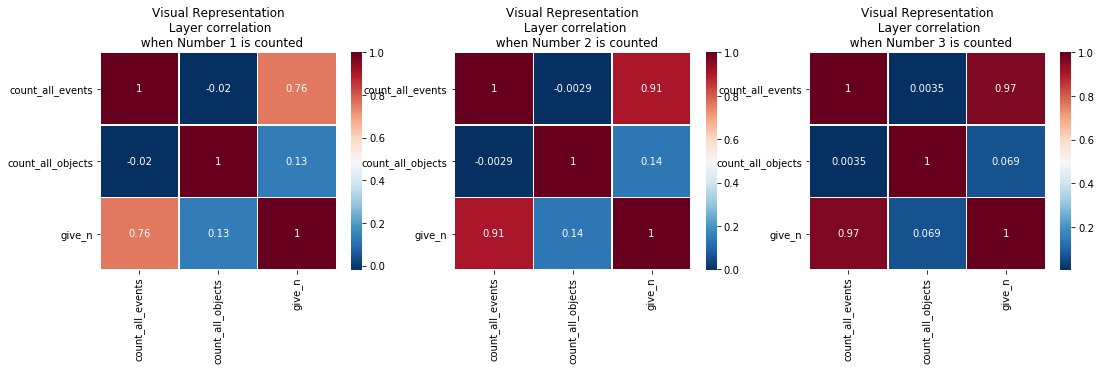

In [645]:
within_class = 'asked_number'
within_class_instance = '1'
check_class = 'task'
df_test = df_new_1
layer = 1
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

corr_matrix = get_correlation_matrix(df_test,within_class,within_class_instance,check_class, layer=layer, plot=True,ax=ax[0] )

within_class_instance = '2'
corr_matrix = get_correlation_matrix(df_test,within_class,within_class_instance,check_class, layer=layer, plot=True,ax=ax[1] )

within_class_instance = '3'
corr_matrix = get_correlation_matrix(df_test,within_class,within_class_instance,check_class, layer=layer, plot=True,ax=ax[2] )

In [631]:
within_class = 'asked_number'
within_class_instance = '3'
check_class = 'task'
df_test = df_new_1

i_class_instance = 'give_n'
j_class_instance = 'count_all_events'

vec1 = get_node_activity_vector(df_test, within_class, within_class_instance, check_class, i_class_instance, layer).values[0]
print(vec1)
vec2 = get_node_activity_vector(df_test, within_class, within_class_instance, check_class, j_class_instance, layer).values[0]
print(vec2)

corry = np.corrcoef(vec1, vec2)[0, 1]

print(corry)

[2.63 0.   4.29 0.   0.   0.   0.   0.   1.32 0.19 0.   0.   2.72 0.61
 0.   3.06 3.34 1.59 0.   0.   0.   0.   0.   2.94 0.   3.24 0.   4.32
 0.   0.   0.   0.   0.   0.   0.   4.56 0.   0.   1.35 0.   1.86 0.
 0.   0.   0.   0.34 0.   2.38 0.   2.99 0.   0.   1.22 0.   0.13 0.
 0.   0.   0.41 0.   0.   0.   0.   1.36 0.   0.   0.   0.   0.94 0.  ]
[1.23 0.   3.38 0.   0.   0.   0.   0.   0.77 0.37 0.   0.36 2.54 0.
 0.   2.6  2.53 1.41 0.   0.   0.   0.   0.   1.43 0.   2.57 0.16 3.49
 0.   0.21 0.   0.   0.   0.   0.   2.78 0.   0.   0.1  0.22 1.03 0.
 0.   0.   0.   0.   0.   1.46 0.   2.29 0.   0.   0.95 0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.64 0.   0.37 0.   0.   0.87 0.  ]
0.965783889046749


In [600]:
within_class = 'task'
within_class_instance = 'count_all_events'
check_class = 'asked_number'
df_test = df_new_1
i_class_instance = '1'
j_class_instance = '2'

vec1 = get_node_activity_vector(df_test, within_class, within_class_instance, check_class, i_class_instance, layer).values[0]
vec2 = get_node_activity_vector(df_test, within_class, within_class_instance, check_class, j_class_instance, layer).values[0]
print(vec1)
print(vec2)

corry = np.corrcoef(vec1, vec2)[0, 1]

print(corry)

[-0.01 -0.44 -0.22  0.35 -0.48  0.23  0.02 -0.51 -0.13 -0.38 -0.07 -0.42
 -0.03  0.    0.12 -0.   -0.    0.05  0.    0.23  0.61  0.02  0.35 -0.
 -0.05 -0.51  0.06 -0.73 -0.44  0.68  0.   -0.6  -0.22]
[ 0.16 -0.09  0.73 -0.64 -0.4  -0.74  0.37 -0.55 -0.05  0.53  0.75 -0.63
 -0.06  0.35  0.04  0.04 -0.    0.01  0.    0.33  0.7   0.54 -0.44 -0.
  0.34 -0.32  0.51 -0.07 -0.04  0.13  0.35  0.63  0.75]
0.08518046915211146


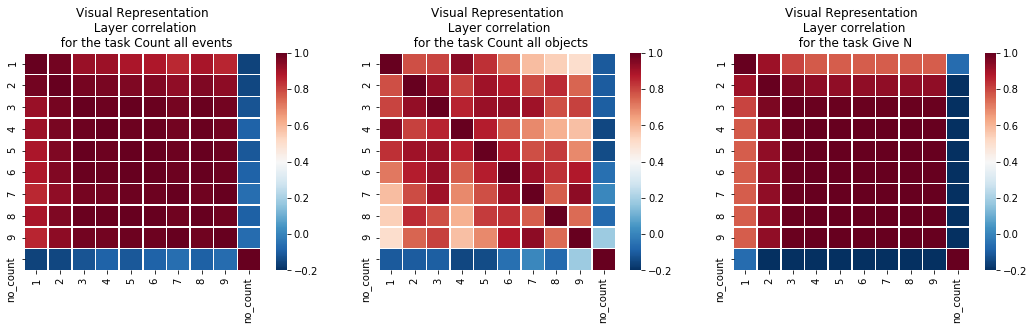

In [836]:
within_class = 'task'
within_class_instance = 'count_all_events'
check_class = 'asked_number'
df_test = df_new_1
layer = 1
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

corr_matrix_entity = []
corr_matrix_entity_1 = get_correlation_matrix(df_test,within_class,within_class_instance,check_class, layer=layer, plot=True,ax=ax[0] )
corr_matrix_entity.append(corr_matrix_entity_1)

within_class_instance = 'count_all_objects'
corr_matrix_entity_2 = get_correlation_matrix(df_test,within_class,within_class_instance,check_class, layer=layer, plot=True,ax=ax[1] )
corr_matrix_entity.append(corr_matrix_entity_2)

within_class_instance = 'give_n'
corr_matrix_entity_3 = get_correlation_matrix(df_test,within_class,within_class_instance,check_class, layer=layer, plot=True,ax=ax[2] )
corr_matrix_entity.append(corr_matrix_entity_3)


PATH = RESULTS_PATH + 'ALIFE_paper/corr_matrices_vis_repr_diff_num_same_task.eps'
fig.savefig(PATH, format='eps')

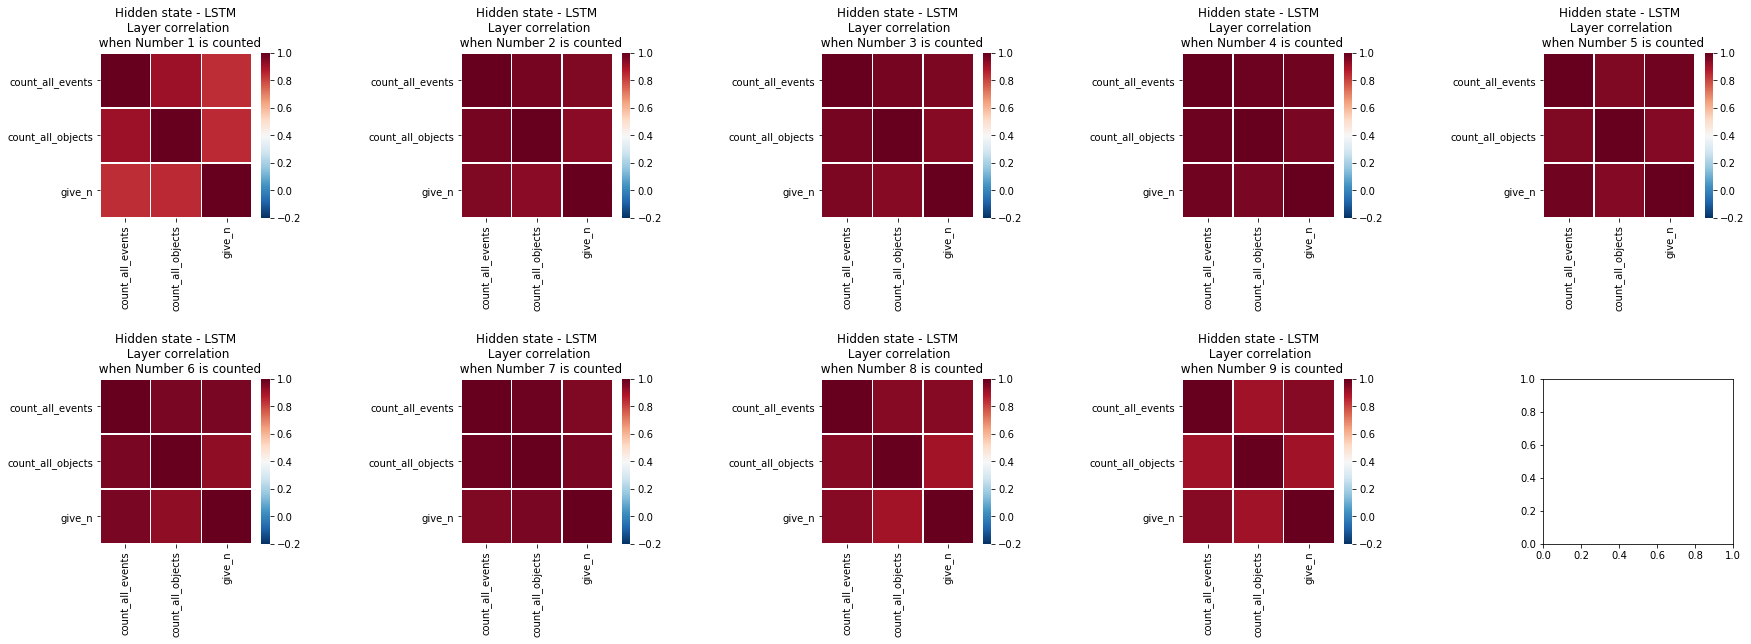

In [837]:
within_class = 'asked_number'
within_class_instance = '3'
check_class = 'task'
df_test = df_new
layer = 0
df_test=df_new_1
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(27, 11))
fig.tight_layout(pad=14.0)
#fig.subplots_adjust(left=None, bottom=None, right=None, top=8, wspace=None, hspace=8)

corr_matrices_task_inv = []

for n in range(1,10):
    within_class_instance = str(n) 
    corr_matrix = get_correlation_matrix(df_test,within_class,within_class_instance,check_class, layer=layer, plot=True,ax= ax[(n-1)//5,(n-1)%5] )
    corr_matrices_task_inv.append(corr_matrix)
    
PATH = RESULTS_PATH + 'ALIFE_paper/corr_matrices_lang_repr_same_num_diff_task.eps'
fig.savefig(PATH, format='eps')

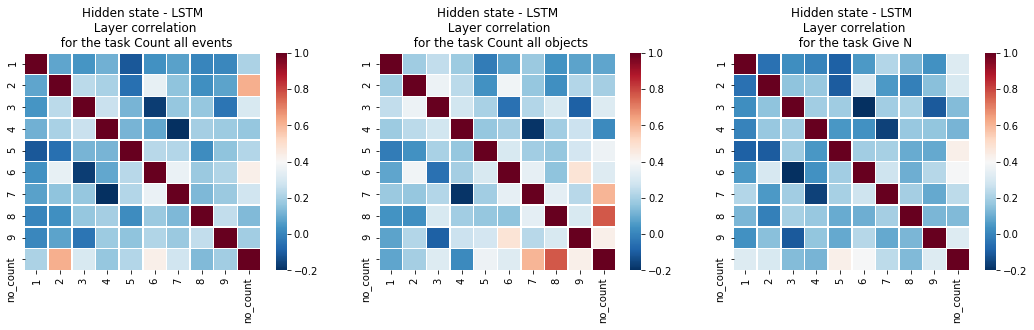

In [838]:
within_class = 'task'
check_class = 'asked_number'
df_test = df_new_1
layer = 0
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

corr_matrix_diff_numb_repr = []

within_class_instance = 'count_all_events'
corr_matrix_diff_numb_repr_1 = get_correlation_matrix(df_test,within_class,within_class_instance,check_class, layer=layer, plot=True,ax=ax[0] )
corr_matrix_diff_numb_repr.append(corr_matrix_diff_numb_repr_1)

within_class_instance = 'count_all_objects'
corr_matrix_diff_numb_repr_2 = get_correlation_matrix(df_test,within_class,within_class_instance,check_class, layer=layer, plot=True,ax=ax[1] )
corr_matrix_diff_numb_repr.append(corr_matrix_diff_numb_repr_2)

within_class_instance = 'give_n'
corr_matrix_diff_numb_repr_3 = get_correlation_matrix(df_test,within_class,within_class_instance,check_class, layer=layer, plot=True,ax=ax[2] )
corr_matrix_diff_numb_repr.append(corr_matrix_diff_numb_repr_3)


PATH = RESULTS_PATH + 'ALIFE_paper/corr_matrices_lang_repr_diff_num_same_task.eps'
fig.savefig(PATH, format='eps')

10

In [ ]:
corr_matrix_in_array = corr_matrix[np.triu_indices(corr_matrix.shape[0], k=1)] #k offsets the diagonal by 1-->excluds diag
print(corr_matrix_in_array)
### great now plot it
plt.boxplot([corr_matrix_in_array,corr_matrix_in_array] )
plt.xticks([1, 2], ['me', 'you'])

([<matplotlib.axis.XTick at 0x14cb1aad438>,
 <a list of 3 Text xticklabel objects>)

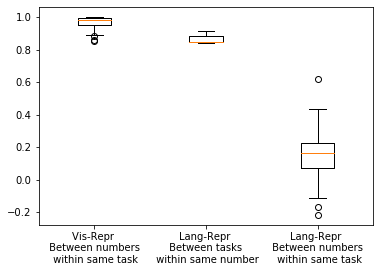

In [683]:
######### now collect all the correlation matrices
# corr_matrix_entity
# corr_matrices_task_inv
# corr_matrix_diff_numb_repr

### done. now make a function out of the boxplot stuff from matrix from above.

corr_matrix_wo_last_col_and_row = corr_matrix_entity[0][:-1, :-1]
arr1 = corr_matrix_wo_last_col_and_row[np.triu_indices(corr_matrix_wo_last_col_and_row.shape[0], k=1)]
#arr1 = corr_matrix_entity[0][np.triu_indices(corr_matrix_entity[0].shape[0], k=1)]
arr2 = corr_matrices_task_inv[0][np.triu_indices(corr_matrices_task_inv[0].shape[0], k=1)]
arr3 = corr_matrix_diff_numb_repr[0][np.triu_indices(corr_matrix_diff_numb_repr[0].shape[0], k=1)]


plt.boxplot([arr1,arr2,arr3] )
plt.xticks([1, 2,3], ['Vis-Repr \n Between numbers \n within same task', 'Lang-Repr \n Between tasks \n within same number', 'Lang-Repr \n Between numbers \n within same task'])

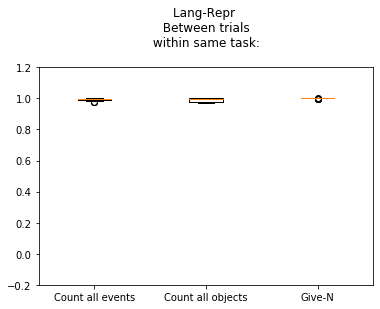

In [846]:
######### now collect all the correlation matrices
# SAME TASK; SAME NUMBER; LANG REPR;  DIFFERENT TRIALS

### 

fig, ax = plt.subplots()   #figsize=(18, 4)

arr1 = corr_matrix_same_numb_same_task[0][np.triu_indices(corr_matrix_same_numb_same_task[0].shape[0], k=1)]
#arr1 = corr_matrix_entity[0][np.triu_indices(corr_matrix_entity[0].shape[0], k=1)]
arr2 = corr_matrix_same_numb_same_task[1][np.triu_indices(corr_matrix_same_numb_same_task[1].shape[0], k=1)]
arr3 = corr_matrix_same_numb_same_task[2][np.triu_indices(corr_matrix_same_numb_same_task[2].shape[0], k=1)]


ax.boxplot([arr1,arr2,arr3] )

xtick_basis = 'Lang-Repr \n Between trials \n within same task: \n'
xtick1 = 'Count all events'  #xtick_basis + 
xtick2 = 'Count all objects'  #xtick_basis + 
xtick3 = 'Give-N'   #xtick_basis + 

ax_title = xtick_basis
ax.set_title(ax_title)
ax.set_xticklabels([xtick1, xtick2, xtick3])
#ax.set_xticks([1, 2,3], [xtick1, xtick2, xtick3])
ax.set_ylim((-0.2,1.2))

PATH = RESULTS_PATH + 'ALIFE_paper/corr_box_plot_lang_repr_same_num_same_task_diff_trials.eps'
fig.savefig(PATH, format='eps')

In [ ]:
corr_matrix_same_numb_same_task

In [676]:
a = np.array([1,2])
b = np.array([3,4])
a = np.append(a,b)
print(a)

[1 2 3 4]


([<matplotlib.axis.XTick at 0x14cc4c55f98>,
 <a list of 3 Text xticklabel objects>)

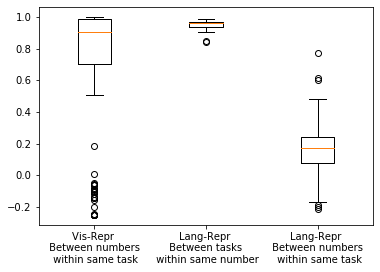

In [679]:
### now put them all together. first try to stack two together the right way


def get_corr_in_arr_from_multiple_corr_matrices(corr_matrix_entity):
    whole_arr = arr = corr_matrix_entity[0][np.triu_indices(corr_matrix_entity[0].shape[0], k=1)]
    for i in range(1,len(corr_matrix_entity)):
        arr = corr_matrix_entity[i][np.triu_indices(corr_matrix_entity[i].shape[0], k=1)]
        whole_arr = np.append(whole_arr,arr)
        
    return whole_arr

whole_arr_entity = get_corr_in_arr_from_multiple_corr_matrices(corr_matrix_entity)
whole_arr_same_numb = get_corr_in_arr_from_multiple_corr_matrices(corr_matrices_task_inv)
whole_arr_diff_numb = get_corr_in_arr_from_multiple_corr_matrices(corr_matrix_diff_numb_repr)

plt.boxplot([whole_arr_entity,whole_arr_same_numb,whole_arr_diff_numb] )
plt.xticks([1, 2,3], ['Vis-Repr \n Between numbers \n within same task', 'Lang-Repr \n Between tasks \n within same number', 'Lang-Repr \n Between numbers \n within same task'])


(-0.2, 1)

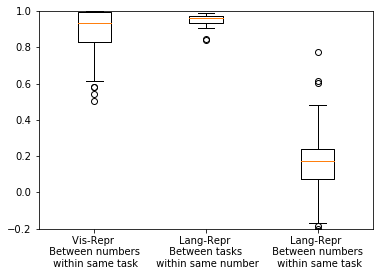

In [708]:
### without no-count col and all data-sets
corr_matrix_entity_reduced = []
for i in range(len(corr_matrix_entity)):
    corr_matrix_entity_reduced.append(corr_matrix_entity[i][:-1,:-1])

whole_arr_entity = get_corr_in_arr_from_multiple_corr_matrices(corr_matrix_entity_reduced)
whole_arr_same_numb = get_corr_in_arr_from_multiple_corr_matrices(corr_matrices_task_inv)
whole_arr_diff_numb = get_corr_in_arr_from_multiple_corr_matrices(corr_matrix_diff_numb_repr)

plt.boxplot([whole_arr_entity,whole_arr_same_numb,whole_arr_diff_numb] )
plt.xticks([1, 2,3], ['Vis-Repr \n Between numbers \n within same task', 'Lang-Repr \n Between tasks \n within same number', 'Lang-Repr \n Between numbers \n within same task'])
plt.ylim((-0.2,1))

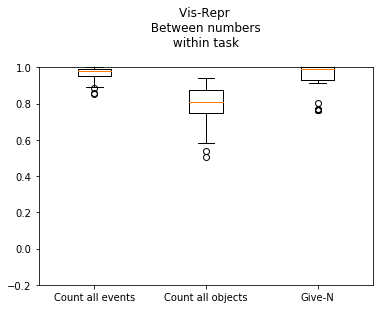

In [847]:
#### keyyyy
def get_seperate_corr_in_arr_from_multiple_corr_matrices(corr_matrix_entity):
    whole_arr =[]
    for i in range(0,len(corr_matrix_entity)):
        arr = corr_matrix_entity[i][np.triu_indices(corr_matrix_entity[i].shape[0], k=1)]
        whole_arr.append(arr)
        
    return whole_arr

fig, ax = plt.subplots()

seperate_arr = get_seperate_corr_in_arr_from_multiple_corr_matrices(corr_matrix_entity_reduced)
# prepare tick labels
tick_labels = []
for i in range(len(seperate_arr)):
    label = readable_task[task_list[i]]
    label = 'Vis-Repr \n Between numbers \n within task \n' + label
    tick_labels.append(label)

ax.boxplot(seperate_arr )

xtick_basis = 'Vis-Repr \n Between numbers \n within task \n'
xtick1 = 'Count all events'  #xtick_basis + 
xtick2 = 'Count all objects'  #xtick_basis + 
xtick3 = 'Give-N'   #xtick_basis + 

ax_title = xtick_basis
ax.set_title(ax_title)
ax.set_xticklabels([xtick1, xtick2, xtick3])

ax.set_ylim((-0.2,1))

PATH = RESULTS_PATH + 'ALIFE_paper/corr_box_plot_vis_repr_diff_num_same_task_wo_no_count.eps'
fig.savefig(PATH, format='eps')


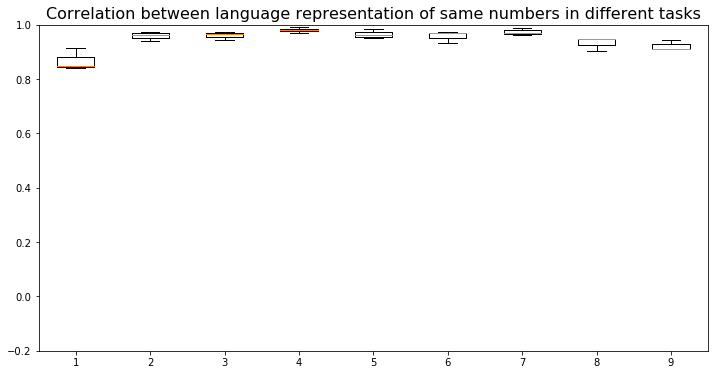

In [851]:
seperate_arr = get_seperate_corr_in_arr_from_multiple_corr_matrices(corr_matrices_task_inv)
# prepare tick labels
tick_labels = []
for i in range(len(seperate_arr)):
    label = df_new_1.asked_number.unique()[i]
    label = 'Lang-Repr \n' + label
    tick_labels.append(label)
fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(seperate_arr )
ax.set_xticks(range(1,len(tick_labels)+1), tick_labels)
ax.set_ylim((-0.2,1))
ax.set_title('Correlation between language representation of same numbers in different tasks', fontsize=16)

PATH = RESULTS_PATH + 'ALIFE_paper/corr_box_plot_vis_repr_same_num_diff_task_wo_no_count.eps'
fig.savefig(PATH, format='eps')

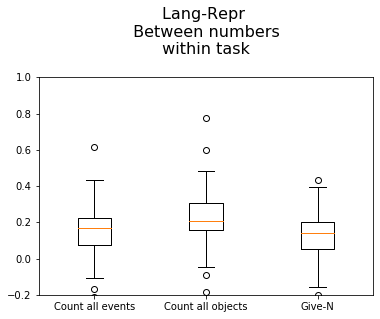

In [854]:

fig, ax = plt.subplots()

seperate_arr = get_seperate_corr_in_arr_from_multiple_corr_matrices(corr_matrix_diff_numb_repr)
# prepare tick labels
tick_labels = []
for i in range(len(seperate_arr)):
    label = readable_task[task_list[i]]
    label = 'Lang-Repr \n Between numbers \n within task \n' + label
    tick_labels.append(label)
#fig, ax = plt.subplots(figsize=(12,6))
ax.boxplot(seperate_arr )


xtick_basis = 'Lang-Repr \n Between numbers \n within task \n'
xtick1 = 'Count all events'  #xtick_basis + 
xtick2 = 'Count all objects'  #xtick_basis + 
xtick3 = 'Give-N'   #xtick_basis + 
tick_labels = [xtick1, xtick2, xtick3]

ax_title = xtick_basis
ax.set_title(ax_title, fontsize=16)
ax.set_xticklabels(tick_labels)
ax.set_ylim((-0.2,1))


PATH = RESULTS_PATH + 'ALIFE_paper/corr_box_plot_lang_repr_diff_num_same_task.eps'
fig.savefig(PATH, format='eps')

In [326]:
import seaborn as sb

sb.heatmap(corry, 
            xticklabels=corry.columns,
            yticklabels=corry.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

AttributeError: 'numpy.float64' object has no attribute 'columns'